### Identify cause of convection in historical experiment when compared with present day

In [2]:
import xarray as xr
import numpy as np
import gsw
import cmocean
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import weddell_convect, ross_convect
# from nemo_python_git.timeseries import calc_hovmoeller_region

In [5]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
ens1011_dir = f'{base_dir}output/CESM2-present-day6/'
pre1011_dir = f'{base_dir}output/CESM2-present-day5/'
piC_dir     = f'{base_dir}output/CESM2-piControl_test1/' 
era5_dir    = f'{base_dir}output/ERA5_test6/'
nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'

## Make animation/plot of vertical diffusivities

For a slight subset of my previous region definition (since the previous region definition included a tiny bit of the shelf break which I think might be where the high diffusivites around 600 m come from):

In [37]:
weddell_convect2 = {'x': slice(950, 1150, None), 'y': slice(295, 360, None)}

In [41]:
run_dir = f'{base_dir}output/ERA5_test7a_1/files/'
nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect2['x'], y=weddell_convect2['y']).rename({'nav_lev':'depthw'})

files = glob.glob(f'{run_dir}eANT025*grid_W*')[0:365]

kwags={'preprocess':lambda ds: ds[['difvho', 'area', 'time_counter']], 'chunks':'auto'}
nemo_ds    = xr.open_mfdataset(files, **kwags)
nemo_ds    = nemo_ds.isel(x=weddell_convect2['x'], y=weddell_convect2['y']) 
area_ocean = xr.where(nemo_mesh_ds.tmask.isel(depthw=0).values==0, np.nan, nemo_ds['area'])
var_ocean  = xr.where(nemo_mesh_ds.tmask.values==0, np.nan, nemo_ds['difvho'])

region_var = (var_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

(1600.0, 0.0)

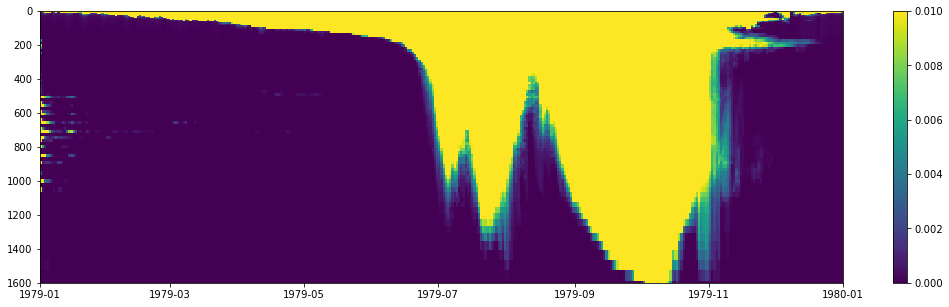

In [42]:
fig, ax = plt.subplots(1,1, figsize=(18,5))
xx, yy = np.meshgrid(region_var.time_counter, region_var.depthw)

cb = ax.pcolormesh(xx.transpose(), yy.transpose(), region_var, vmin=0, vmax=1e-2)

fig.colorbar(cb, ax=ax)
ax.set_ylim(1600, 0)

For the larger region definition

In [22]:
# run_dir = f'{base_dir}output/ERA5_test7/files_spinup/'
run_dir = f'{base_dir}output/ERA5_test7a_1/files/'
# run_dir = f'{base_dir}output/ERA5_test6/files_spinup/'
nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect['x'], y=weddell_convect['y']).rename({'nav_lev':'depthw'})

files = glob.glob(f'{run_dir}eANT025*grid_W*')

kwags={'preprocess':lambda ds: ds[['difvho', 'area', 'time_counter']], 'chunks':'auto'}
nemo_ds    = xr.open_mfdataset(files, **kwags)
nemo_ds    = nemo_ds.isel(x=weddell_convect['x'], y=weddell_convect['y']) 
area_ocean = xr.where(nemo_mesh_ds.tmask.isel(depthw=0).values==0, np.nan, nemo_ds['area'])
var_ocean  = xr.where(nemo_mesh_ds.tmask.values==0, np.nan, nemo_ds['difvho'])

region_var = (var_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

plot vertical diffusivity map at 600 m for early may to see whether there are particular regions where this feature mainly shows up

In [43]:
file = glob.glob(f'{run_dir}eANT025*grid_W*')[120]
mayW = xr.open_dataset(file).squeeze()
mesh = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0)
diff = xr.where(mesh.tmask.values==0, np.nan, mayW.difvho)

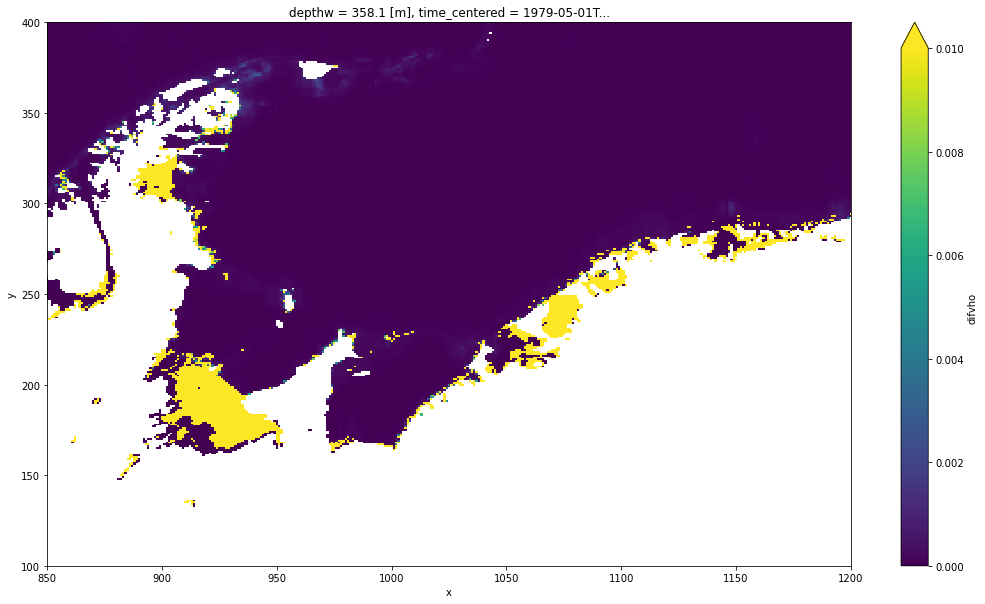

In [55]:
diff.isel(depthw=42).plot(figsize=(18,10), xlim=(850, 1200), ylim=(100, 400), vmin=0, vmax=1e-2)

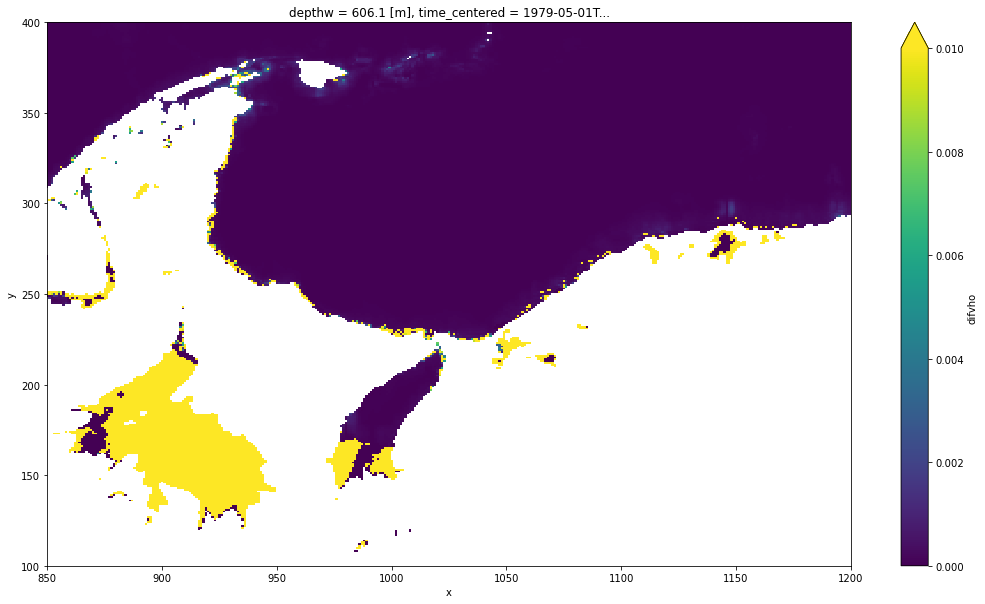

In [35]:
diff.isel(depthw=57).plot(figsize=(18,10), xlim=(850, 1200), ylim=(100, 400), vmin=0, vmax=1e-2)

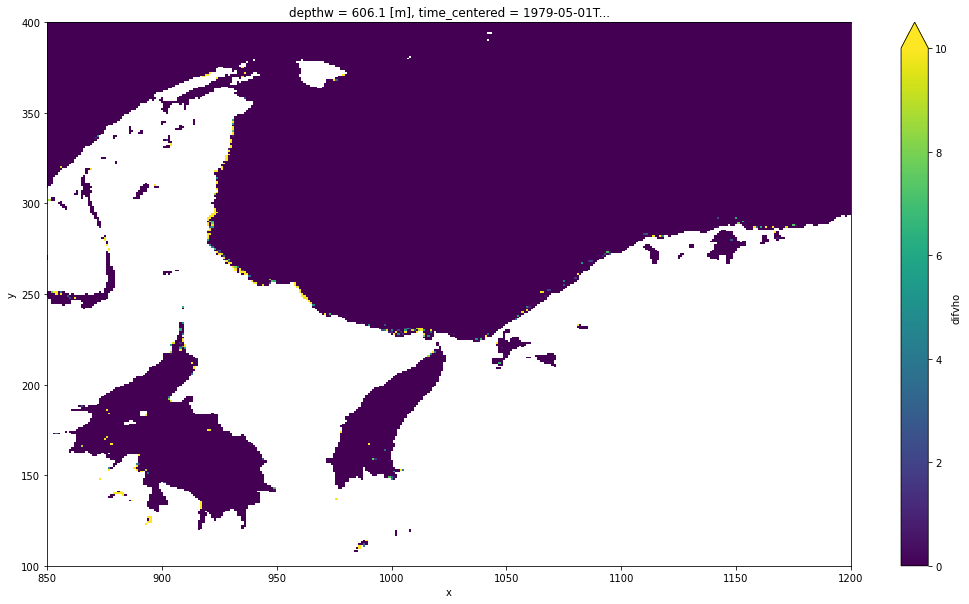

In [45]:
diff.isel(depthw=57).plot(figsize=(18,10), xlim=(850, 1200), ylim=(100, 400), vmin=0, vmax=10)

(1600.0, 0.0)

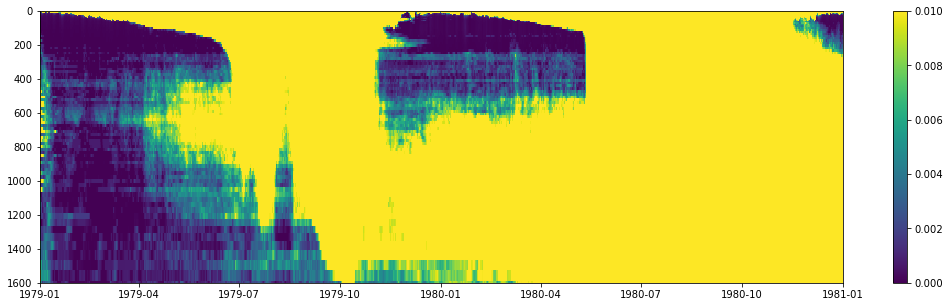

In [23]:
fig, ax = plt.subplots(1,1, figsize=(18,5))
xx, yy = np.meshgrid(region_var.time_counter, region_var.depthw)

cb = ax.pcolormesh(xx.transpose(), yy.transpose(), region_var, vmin=0, vmax=1e-2)

fig.colorbar(cb, ax=ax)
ax.set_ylim(1600, 0)

(1600.0, 0.0)

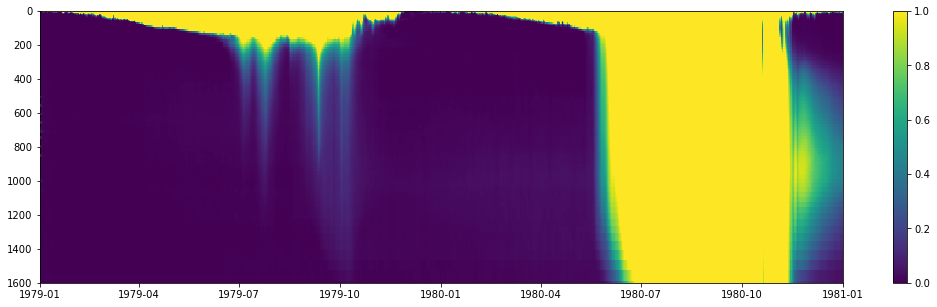

In [24]:
fig, ax = plt.subplots(1,1, figsize=(18,5))
xx, yy = np.meshgrid(region_var.time_counter, region_var.depthw)

cb = ax.pcolormesh(xx.transpose(), yy.transpose(), region_var, vmin=0, vmax=1)

fig.colorbar(cb, ax=ax)
ax.set_ylim(1600, 0)

(1600.0, 0.0)

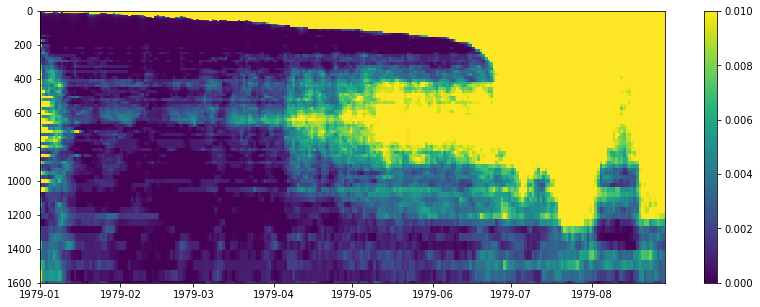

In [21]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
xx, yy = np.meshgrid(region_var.time_counter, region_var.depthw)

cb = ax.pcolormesh(xx.transpose(), yy.transpose(), region_var, vmin=0, vmax=1e-2)

fig.colorbar(cb, ax=ax)
ax.set_ylim(1600, 0)

#### plot vertical shear of u and v:

In [51]:
# plot vertical shear of u and v:

run_dir = f'{base_dir}output/ERA5_test7a_1/files/'

nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect['x'], y=weddell_convect['y'])

filesU = glob.glob(f'{run_dir}eANT025*grid_U*')[0:240]
filesV = glob.glob(f'{run_dir}eANT025*grid_V*')[0:240]

kwagsU={'preprocess':lambda ds: ds[['uo', 'area', 'time_counter']], 'chunks':'auto'}
kwagsV={'preprocess':lambda ds: ds[['vo', 'area', 'time_counter']], 'chunks':'auto'}
nemo_dsU = xr.open_mfdataset(filesU, **kwagsU).isel(x=weddell_convect['x'], y=weddell_convect['y']) 
nemo_dsV = xr.open_mfdataset(filesV, **kwagsV).isel(x=weddell_convect['x'], y=weddell_convect['y']) 
area_oceanU = xr.where(nemo_mesh_ds.umask.isel(nav_lev=0).values==0, np.nan, nemo_dsU['area'])
area_oceanV = xr.where(nemo_mesh_ds.vmask.isel(nav_lev=0).values==0, np.nan, nemo_dsV['area'])
var_oceanU  = xr.where(nemo_mesh_ds.umask.values==0, np.nan, nemo_dsU['uo'])
var_oceanV  = xr.where(nemo_mesh_ds.vmask.values==0, np.nan, nemo_dsV['vo'])

region_varU = ((var_oceanU*area_oceanU).sum(dim=['x','y'])/(area_oceanU.sum(dim=['x','y']))).diff(dim='depthu')
region_varV = ((var_oceanV*area_oceanV).sum(dim=['x','y'])/(area_oceanV.sum(dim=['x','y']))).diff(dim='depthv')

shear = ((region_varU.rename({'depthu':'depth'})**2)+ (region_varV.rename({'depthv':'depth'})**2))

(1600.0, 0.0)

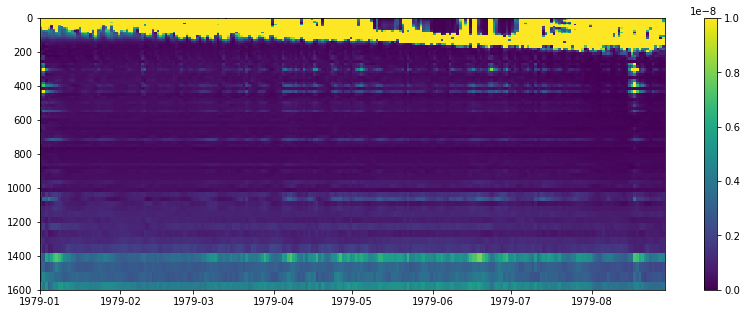

In [52]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
xx, yy = np.meshgrid(shear.time_counter, shear.depth)

cb = ax.pcolormesh(xx.transpose(), yy.transpose(), shear, vmin=0, vmax=1e-8)

fig.colorbar(cb, ax=ax)
ax.set_ylim(1600, 0)

#### Plot the stratification

$N^2 = \frac{-g}{\rho_0} \frac{\partial \rho}{\partial z} $

In [6]:
run_dir = f'{base_dir}output/ERA5_test7a_1/files/'
files = glob.glob(f'{run_dir}eANT025*grid_T*')[200:220]

nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect['x'], y=weddell_convect['y']).rename({'nav_lev':'deptht'})
kwags={'preprocess':lambda ds: ds[['so', 'thetao', 'area_grid_T', 'time_counter']], 'chunks':'auto'}
nemo_ds    = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
nemo_ds    = nemo_ds.isel(x=weddell_convect['x'], y=weddell_convect['y']) 
area_ocean = xr.where(nemo_mesh_ds.tmask.isel(deptht=0).values==0, np.nan, nemo_ds['area'])
S_ocean    = xr.where(nemo_mesh_ds.tmask.values==0, np.nan, nemo_ds['so'])
T_ocean    = xr.where(nemo_mesh_ds.tmask.values==0, np.nan, nemo_ds['thetao'])

region_T = (T_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
region_S = (S_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

rho = gsw.density.rho(region_S, region_T, nemo_mesh_ds.deptht)
N2 = -9.81*1e-3*rho.diff(dim='deptht')

(1600.0, 0.0)

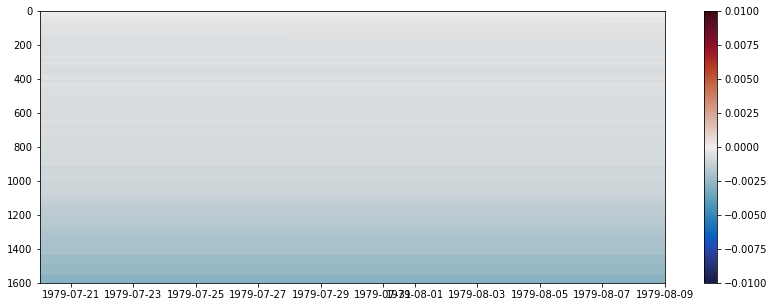

In [7]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
xx, yy = np.meshgrid(N2.time_counter, N2.deptht)

cb = ax.pcolormesh(xx.transpose(), yy.transpose(), N2, vmin=-2e-3, vmax=2e-3, cmap=cmocean.cm.balance)

fig.colorbar(cb, ax=ax)
ax.set_ylim(1600, 0)

## Vertical profiles

- visualize temperature, salinity, and density profiles in convection regions

In [15]:
files = glob.glob(f'{base_dir}output/ERA5_test7/files_spinup/eANT025*grid_T*')[0:1] 

kwags={'preprocess':lambda ds: ds[['so', 'thetao', 'area_grid_T', 'time_counter']], 'chunks':'auto'}
nemo_ds    = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
nemo_ds    = nemo_ds.isel(x=weddell_convect['x'], y=weddell_convect['y']) 
area_ocean = xr.where(nemo_mesh_ds.tmask==0, np.nan, nemo_ds['area'])
var_ocean  = xr.where(nemo_mesh_ds.tmask==0, np.nan, nemo_ds['thetao'])

region_var = (var_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

In [67]:
import warnings

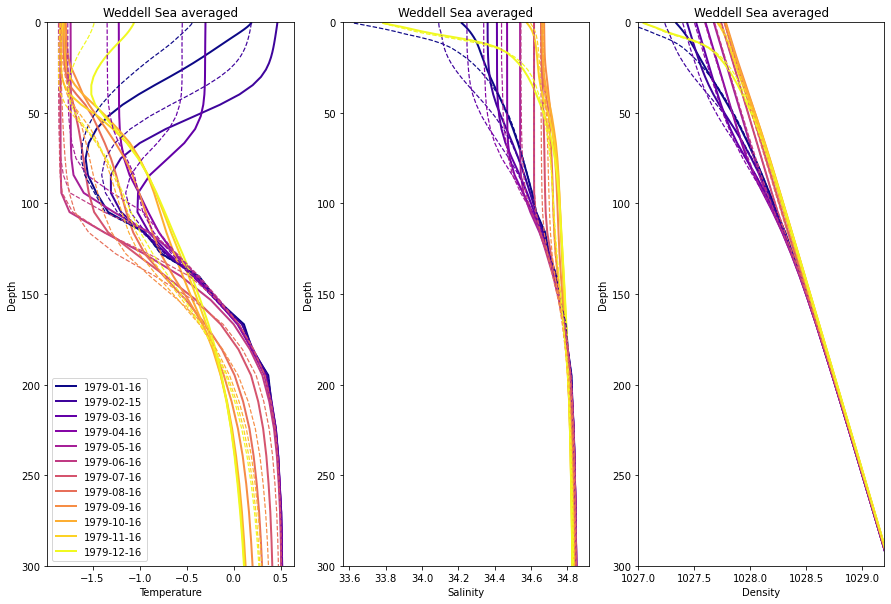

In [82]:
nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'
nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect['x'], y=weddell_convect['y']).rename({'nav_lev':'deptht'})#.isel(nav_lev=0)

cmap = mpl.colormaps['plasma']
linestyles=['-', '--']
linewidths=[2, 1.2]

run_dirs = [f'{base_dir}output/ERA5_test7/', f'{base_dir}output/ERA5_WOA_moreice/']
labels  = ['WOA IC ERA5','WOA IC ERA5, May ice IC']
# run_dirs = [f'{base_dir}output/ERA5_WOA_SOSE/']
# labels   = ['WOA / SOSE BCs, SOSE ICs']
fig, ax = plt.subplots(1,3, figsize=(15,10))
for r, run_dir in enumerate(run_dirs):

    files = glob.glob(f'{run_dir}files/eANT025*grid_T*')[0:1] 
    
    kwags={'preprocess':lambda ds: ds[['so', 'thetao', 'area_grid_T', 'time_counter']], 'chunks':'auto'}
    nemo_ds    = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
    nemo_ds    = nemo_ds.isel(x=weddell_convect['x'], y=weddell_convect['y']) 
    area_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['area'])
    temp_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['thetao'])
    salt_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['so'])

    region_temp = (temp_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
    region_salt = (salt_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

    colors = cmap(np.linspace(0, 1, nemo_ds.time_counter.size))

    for t, time in enumerate(var_ocean.time_counter):
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', 'invalid value encountered in true_divide', RuntimeWarning)
            region_rho = gsw.density.rho(region_salt.sel(time_counter=time), region_temp.sel(time_counter=time), nemo_mesh_ds.deptht)
            
            if r==0:
                kwags1={'label':np.datetime_as_string(time).split('T')[0], 'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            else:
                kwags1={'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            ax[0].plot(region_temp.sel(time_counter=time), nemo_mesh_ds.deptht, color=colors[t], **kwags1) 
            ax[1].plot(region_salt.sel(time_counter=time), nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])
            ax[2].plot(region_rho, nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])

for axis in ax.ravel():
    axis.set_ylim(300,0)
    axis.set_title(f'Weddell Sea averaged')
    axis.set_ylabel('Depth')
    
ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Salinity')
ax[2].set_xlabel('Density')
ax[2].set_xlim(1027, 1029.2)
# ax[2].set_xlim(1027, 1032)
ax[0].legend()

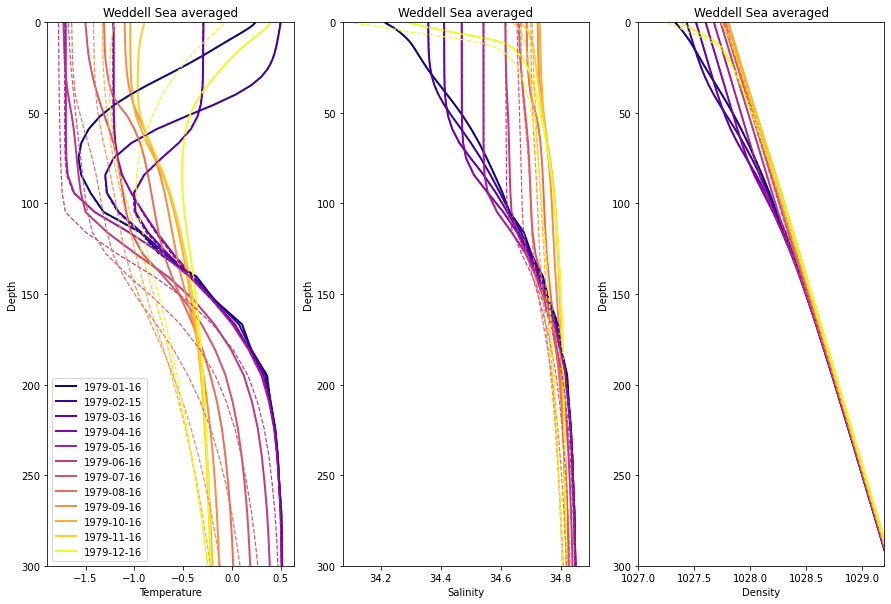

In [83]:
nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'
nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect['x'], y=weddell_convect['y']).rename({'nav_lev':'deptht'})#.isel(nav_lev=0)

cmap = mpl.colormaps['plasma']
linestyles=['-', '--']
linewidths=[2, 1.2]

run_dirs = [f'{base_dir}output/EOS_test1/', f'{base_dir}output/EOS_test2/']
labels   = ['EOS test1', 'EOS test2']
fig, ax = plt.subplots(1,3, figsize=(15,10))
for r, run_dir in enumerate(run_dirs):
    
    files = glob.glob(f'{run_dir}files/eANT025*grid_T*')[0:1] 
    
    kwags={'preprocess':lambda ds: ds[['so', 'thetao', 'area_grid_T', 'time_counter']], 'chunks':'auto'}
    nemo_ds    = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
    nemo_ds    = nemo_ds.isel(x=weddell_convect['x'], y=weddell_convect['y']) 
    area_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['area'])
    temp_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['thetao'])
    salt_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['so'])

    region_temp = (temp_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
    region_salt = (salt_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

    colors = cmap(np.linspace(0, 1, nemo_ds.time_counter.size))

    for t, time in enumerate(var_ocean.time_counter):
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', 'invalid value encountered in true_divide', RuntimeWarning)
            region_rho = gsw.density.rho(region_salt.sel(time_counter=time), region_temp.sel(time_counter=time), nemo_mesh_ds.deptht)
            
            if r==0:
                kwags1={'label':np.datetime_as_string(time).split('T')[0], 'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            else:
                kwags1={'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            ax[0].plot(region_temp.sel(time_counter=time), nemo_mesh_ds.deptht, color=colors[t], **kwags1) 
            ax[1].plot(region_salt.sel(time_counter=time), nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])
            ax[2].plot(region_rho, nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])

for axis in ax.ravel():
    axis.set_ylim(300,0)
    axis.set_title(f'Weddell Sea averaged')
    axis.set_ylabel('Depth')
    
ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Salinity')
ax[2].set_xlabel('Density')
ax[2].set_xlim(1027, 1029.2)
# ax[2].set_xlim(1027, 1032)
ax[0].legend()

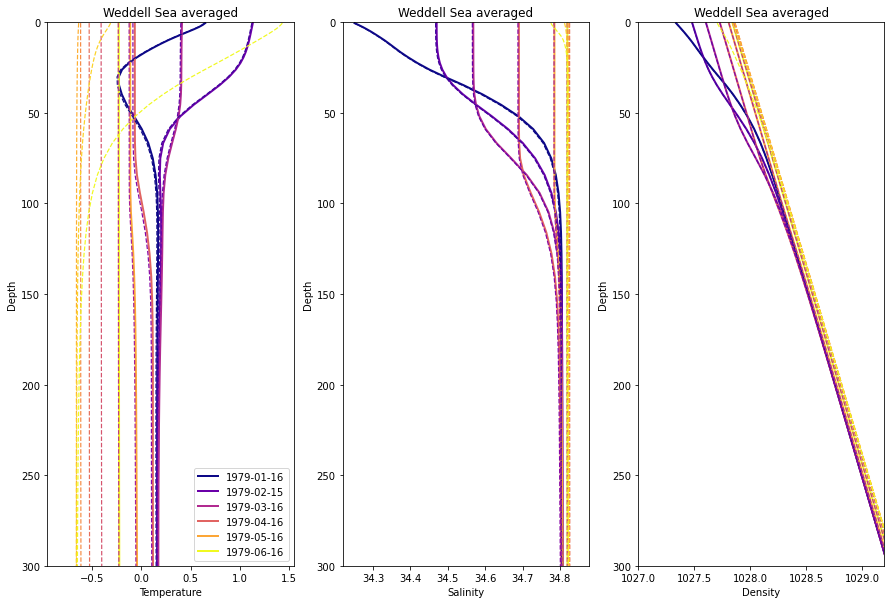

In [85]:
nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'
nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect['x'], y=weddell_convect['y']).rename({'nav_lev':'deptht'})#.isel(nav_lev=0)

cmap = mpl.colormaps['plasma']
linestyles=['-', '--']
linewidths=[2, 1.2]

run_dirs = [f'{base_dir}output/EOS_test3/', f'{base_dir}output/EOS_test4/']
labels   = ['EOS test3', 'EOS test4']
fig, ax = plt.subplots(1,3, figsize=(15,10))
for r, run_dir in enumerate(run_dirs):
    
    files = glob.glob(f'{run_dir}files/eANT025*grid_T*')[0:1] 
    
    kwags={'preprocess':lambda ds: ds[['so', 'thetao', 'area_grid_T', 'time_counter']], 'chunks':'auto'}
    nemo_ds    = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
    nemo_ds    = nemo_ds.isel(x=weddell_convect['x'], y=weddell_convect['y']) 
    area_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['area'])
    temp_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['thetao'])
    salt_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['so'])

    region_temp = (temp_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
    region_salt = (salt_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

    colors = cmap(np.linspace(0, 1, nemo_ds.time_counter.size))

    for t, time in enumerate(region_temp.time_counter):
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', 'invalid value encountered in true_divide', RuntimeWarning)
            region_rho = gsw.density.rho(region_salt.isel(time_counter=t), region_temp.sel(time_counter=time), nemo_mesh_ds.deptht)
            
            if r==0:
                kwags1={'label':np.datetime_as_string(time).split('T')[0], 'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            else:
                kwags1={'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            ax[0].plot(region_temp.isel(time_counter=t), nemo_mesh_ds.deptht, color=colors[t], **kwags1) 
            ax[1].plot(region_salt.isel(time_counter=t), nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])
            ax[2].plot(region_rho, nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])

for axis in ax.ravel():
    axis.set_ylim(300,0)
    axis.set_title(f'Weddell Sea averaged')
    axis.set_ylabel('Depth')
    
ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Salinity')
ax[2].set_xlabel('Density')
ax[2].set_xlim(1027, 1029.2)
# ax[2].set_xlim(1027, 1032)
ax[0].legend()

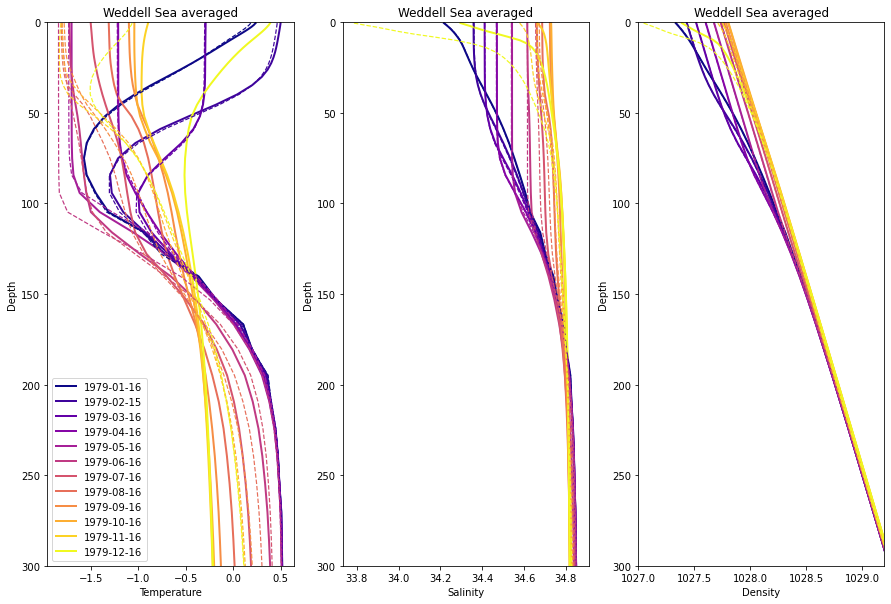

In [86]:
nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'
nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=weddell_convect['x'], y=weddell_convect['y']).rename({'nav_lev':'deptht'})#.isel(nav_lev=0)

cmap = mpl.colormaps['plasma']
linestyles=['-', '--']
linewidths=[2, 1.2]

run_dirs = [f'{base_dir}output/EOS_test1/', f'{base_dir}output/EOS_test5/']
labels   = ['EOS test1', 'EOS test5']
fig, ax = plt.subplots(1,3, figsize=(15,10))
for r, run_dir in enumerate(run_dirs):
    
    files = glob.glob(f'{run_dir}files/eANT025*grid_T*')[0:1] 
    
    kwags={'preprocess':lambda ds: ds[['so', 'thetao', 'area_grid_T', 'time_counter']], 'chunks':'auto'}
    nemo_ds    = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
    nemo_ds    = nemo_ds.isel(x=weddell_convect['x'], y=weddell_convect['y']) 
    area_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['area'])
    temp_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['thetao'])
    salt_ocean = xr.where((nemo_mesh_ds.tmask==0), np.nan, nemo_ds['so'])

    region_temp = (temp_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
    region_salt = (salt_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))

    colors = cmap(np.linspace(0, 1, nemo_ds.time_counter.size))

    for t, time in enumerate(region_temp.time_counter):
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', 'invalid value encountered in true_divide', RuntimeWarning)
            region_rho = gsw.density.rho(region_salt.isel(time_counter=t), region_temp.sel(time_counter=time), nemo_mesh_ds.deptht)
            
            if r==0:
                kwags1={'label':np.datetime_as_string(time).split('T')[0], 'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            else:
                kwags1={'linewidth':linewidths[r], 'linestyle':linestyles[r]}
            ax[0].plot(region_temp.isel(time_counter=t), nemo_mesh_ds.deptht, color=colors[t], **kwags1) 
            ax[1].plot(region_salt.isel(time_counter=t), nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])
            ax[2].plot(region_rho, nemo_mesh_ds.deptht, color=colors[t], linewidth=linewidths[r], linestyle=linestyles[r])

for axis in ax.ravel():
    axis.set_ylim(300,0)
    axis.set_title(f'Weddell Sea averaged')
    axis.set_ylabel('Depth')
    
ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Salinity')
ax[2].set_xlabel('Density')
ax[2].set_xlim(1027, 1029.2)
# ax[2].set_xlim(1027, 1032)
ax[0].legend()

## Sea ice formation?

Look at monthly variable timeseries alongside the convection time series

In [6]:
icemod_files = glob.glob(f'{era5_dir}files/*icemod*')[0:2]
SBC_files    = glob.glob(f'{era5_dir}files/*SBC*')

In [8]:
# ds_ice = xr.open_mfdataset(icemod_files, preprocess=lambda ds: ds[['sithic', 'area']], chunks='auto')

# ds_sbc = xr.open_mfdataset(SBC_files, decode_cf=False, parallel=True)

In [9]:
ice_vars = ['sithic', 'sisali', 'siapnd', 'sitemp', 'sidive', 'sishea', 'qt_oce_ai', 'qt_atm_oi', \
            'qtr_ice_bot', 'qt_ice', 'qemp_ice', 'sfxice']

# run_dirs = [f'{base_dir}output/CESM2-present-day6/files/', f'{base_dir}output/CESM2-present-day5/files_spinup/', 
#             f'{base_dir}output/CESM2-present-day5/files/', f'{base_dir}output/CESM2-piControl_test1/files/',
#             f'{base_dir}output/ERA5_test6/files/']
run_dirs = [f'{base_dir}output/CESM2-piControl_test1/files/']

In [10]:
weddell_tarkan_convect = {'x':slice(1132,1265),'y':slice(310,365)}

In [ ]:
for r, run_dir in enumerate(run_dirs):
    print(run_dir)
    var_weddell = calc_hovmoeller_region(ice_vars, weddell_tarkan_convect, region_name='Weddell_Tarkan',
                                         run_folder=run_dir, file_type='icemod')

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2-present-day6/files/
loading files
saving file
sithic
sisali
siapnd
sitemp
sidive
sishea
qt_oce_ai
qt_atm_oi
qtr_ice_bot
qt_ice
qemp_ice
sfxice


/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2-present-day6/
plotting
/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2-present-day5/
plotting
/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2-piControl_test1/
plotting


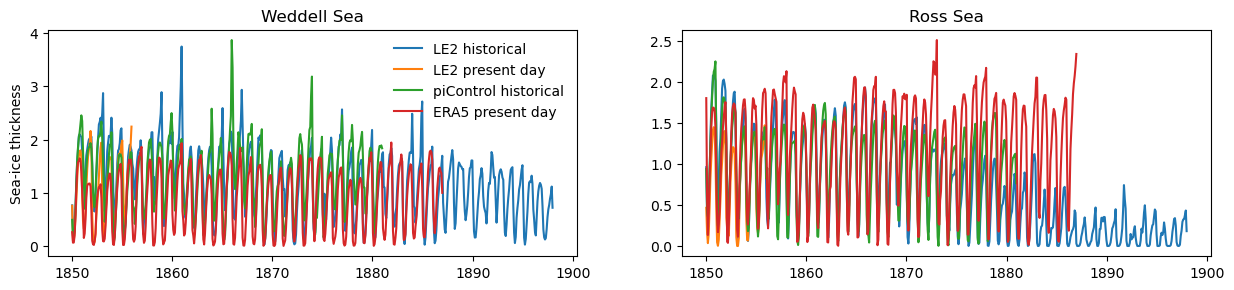

In [8]:
for var in ice_vars:
    print(var)
    
    fig, ax = plt.subplots(1,1, figsize=(10,3), dpi=100)
    ax.set_title('Weddell Sea')
    ax.set_ylabel(ds_ice[var].long_name)
    
    for r, run_dir in enumerate(run_dirs):
        print(run_dir)
        var_weddell = calc_hovmoeller_region(var, weddell_convect, run_folder=run_dir, file_type='icemod')
        # var_ross    = calc_hovmoeller_region(var, ross_convect   , run_folder=run_dir, file_type='icemod')

        # ds = xr.Dataset({f'Weddell_{var}':var_weddell, f'Ross_{var}':var_ross})
        
        # ds.to_netcdf(f'{run_dir}weddell_ross_icemod_timeseries.nc')

        print('plotting')
        if var_weddell.time_counter.dt.year[0]==1979:
            ax.plot(var_weddell.time_counter - pd.Timedelta(days=365*129+31), var_weddell, label=dir_name[r])
        elif spin_up2:
            ax.plot(var_weddell.time_counter - pd.Timedelta(days=365*100), var_weddell, label=dir_name[r])
            # ax[1].plot(var_ross.time_counter - pd.Timedelta(days=365*129+31)   , var_ross   , label=dir_name[r])
        else:
            ax.plot(var_weddell.time_counter, var_weddell, label=dir_name[r])
            # ax[1].plot(var_ross.time_counter   , var_ross, label=dir_name[r])
    
    ax.legend(frameon=False)

    fig.savefig('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/weddell_timeseries_{var}.jpg')

- write into timeseries code
- figure out why calculating the timeseries is so slow! The files are large, but still... same issue as when calculating bottom water timeseries etc.
- consider using xr open_mfdataset with multiple threads and write out to zarr

```
# I'm not sure if you have conflicting variable names - you'll need to
# tailor this line to your data setup. It may be that you want to just
# concatenate along years and then use `xr.merge` to combine the
# variables, or just handle one variable at a time
ds = xr.open_mfdataset(
    filepaths,
    combine='nested',
    concat_dim=['variable', 'year'],
    parallel=True,
)

# this will only schedule the operation - no work is done until the next line
ds_nodes = ds.sel(lat=node_indexer.lat, lon=node_indexer.lon)

# this triggers the operation using a dask LocalCluster, leveraging
# multiple threads on your machine (or a distributed Client if you have
# one set up)
ds_nodes.to_netcdf('all_the_data.zarr')

xr.to_zarr(append=True)

# alternatively, you could still dump to pandas:
df = ds_nodes.to_dataframe()
```

In [3]:
def calc_hovmoeller_region(var, region, file_type='grid_T', region_name='Weddell',
                           run_folder='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/reference-4.2.2/',
                           nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'):
    # NEMO meshmask
    nemo_mesh_ds     = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=region['x'], y=region['y']).rename({'nav_lev':'deptht'})
    
    # Load gridT files into dataset:
    files = glob.glob(f'{run_folder}eANT025*{file_type}*') 
    print('loading files')
    if file_type=='grid_T' or file_type=='SBC':
        kwags={'preprocess':lambda ds: ds[var + ['area_grid_T', 'time_counter']], 'chunks':'auto'}
        nemo_ds      = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
        if file_type=='SBC': 
            nemo_mesh_ds = nemo_mesh_ds.isel(deptht=0)
    elif file_type=='icemod' or file_type=='grid_W':
        kwags={'preprocess':lambda ds: ds[var + ['area', 'time_counter']], 'chunks':'auto'}
        nemo_ds      = xr.open_mfdataset(files, **kwags)
        if file_type=='icemod':
            nemo_mesh_ds = nemo_mesh_ds.isel(deptht=0)

    nemo_ds    = nemo_ds.isel(x=region['x'], y=region['y']) 
    area_ocean = xr.where(nemo_mesh_ds.tmask==0, np.nan, nemo_ds['area'])

    print('saving file')
    var_ds = xr.Dataset()
    for varname in var:
        print(varname)
        var_ocean  = xr.where(nemo_mesh_ds.tmask==0, np.nan, nemo_ds[varname])
        region_var = (var_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
        var_ds     = var_ds.assign({f'{region_name}_{varname}':region_var})
        
    var_ds.to_netcdf(f'{run_folder}{region_name}_{file_type}_timeseries.nc')
    return var_ds

## Surface mixing?

## Total precipitation?

In [4]:
run_dirs = [f'{base_dir}output/CESM2-present-day6/files/']

In [5]:
SBC_vars = ['wfo','sohefldo','sfx','windsp','precip','snowpre','iceberg_cea','berg_hcflx','berg_varea']

In [10]:
for r, run_dir in enumerate(run_dirs):
    print(run_dir)
    var_region = calc_hovmoeller_region(SBC_vars, ross_convect, region_name='Ross', run_folder=run_dir, file_type='SBC')

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2-present-day6/files/
loading files
saving file
wfo
sohefldo
sfx
windsp
precip
snowpre
iceberg_cea
berg_hcflx
berg_varea


In [6]:
for r, run_dir in enumerate(run_dirs):
    print(run_dir)
    var_region = calc_hovmoeller_region(SBC_vars, weddell_convect, region_name='Weddell', run_folder=run_dir, file_type='SBC')

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2-present-day6/files/
loading files
saving file
wfo
sohefldo
sfx
windsp
precip
snowpre
iceberg_cea
berg_hcflx
berg_varea


### gridT and gridW variables

In [1]:
run_dirs = [f'{base_dir}output/CESM2-piControl_test1/files/'] #[f'{base_dir}output/CESM2-present-day5/files_spinup/', f'{base_dir}output/CESM2-present-day5/files/']#, 
            # f'{base_dir}output/CESM2-piControl_test1/files/']
gridW_vars = ['wo', 'difvho']

## consider something like wind divergence or some other metric of the strength of the low pressure gyres 

NameError: name 'base_dir' is not defined

In [ ]:
for r, run_dir in enumerate(run_dirs):
    print(run_dir)
    # var_region = calc_hovmoeller_region(gridT_vars, weddell_convect, region_name='Weddell', run_folder=run_dir, file_type='grid_T')
    var_region = calc_hovmoeller_region(gridW_vars, weddell_convect, region_name='Weddell', run_folder=run_dir, file_type='grid_W')

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2-piControl_test1/files/
loading files
saving file
wo
difvho


/home/users/birgal/.conda/envs/jaspy3.10/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


## 2D maps of anomalies relative to initial conditions
- Is it just not enough cold salty dense water formation on the shelf that then helps prevent convection?

Want a map of 2D anomaly relative to initial conditions of: surface T, S; 500-2000 m T, S and delta surface - CDW. Code now generalized in: analysis-scripts/animate-delta-convection.py

Simulation tests:
- 7a --- no diff
- 7b --- weaker sea level drop (although still convecting); the change was to change rn_amax_s = 0.94 to 0.99
- 7c --- no diff
- 7d --- no diff
- 7e --- no diff 
- 7f --- worse
- 7g --- 

Looks to me like the trend is actually a strong cooling and freshening at intermediate depth, so maybe it could be related to the amount of dense water formed on the shelf to the east of the peninsula?? If so, check what the sea ice formation is doing there relative to what we expect. On shelf east peninsula does not show obvious bottom temperature cooling but does get somewhat saltier. I guess one option is that the WOA initial conditions just aren't stable. First little spot shows up as both cooling at surface and warming at intermediate depth in month 9. Months preceding convection, cooling is present at surface.

Next steps:
- look at profile on east peninsula shelf and places of dense overflows, and profiles in FRIS basin
- look at sea ice formation rate maps and also sea ice thickness and sea ice concentration (with higher resolution)

In [22]:
run_dir = f'{base_dir}output/ERA5_test7a_1/'
file = glob.glob(f'{run_dir}files/*icemod*')[165:166]

ds = xr.open_dataset(file[0])

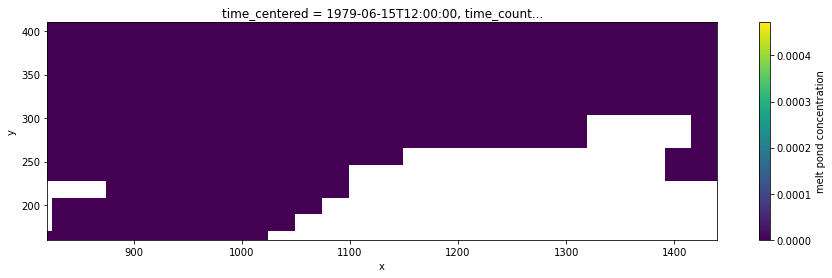

In [23]:
ds.isel(time_counter=0).siapnd.plot(figsize=(15,4), xlim=(820,None), ylim=(160, 410), vmin=0)

In [8]:
run_dir = f'{base_dir}output/ERA5_test7a_1/files/'
ds1 = xr.open_dataset(f'{run_dir}eANT025.L121_1d_19790101_19791231_SBC_19790808-19790808.nc')
ds2 = xr.open_dataset(f'{run_dir}eANT025.L121_1d_19790101_19791231_grid_T_19790808-19790808.nc')

In [ ]:
# sfx, wfo 

In [12]:
for key in list(ds1.keys()):
    try:
        print(key, ds1[key].long_name)
    except:
        continue

wfo Net Upward Water Flux
sohefldo Net Downward Heat Flux
soshfldo Shortwave Radiation
erp Surface Water Flux: Damping
qsr_oce solar heat flux at ocean surface
qns non solar Downward Heat Flux
aeiv_2d  surface v-EIV coefficient
qns_oce non-solar heat flux at ocean surface (including E-P)
qt_oce total flux at ocean surface
qlw_oce Longwave Downward Heat Flux over open ocean
qsb_oce Sensible Downward Heat Flux over open ocean
qla_oce Latent Downward Heat Flux over open ocean
sfx Downward salt flux
taum wind stress module
windsp wind speed module
runoffs River Runoffs
precip Total precipitation
snowpre Snow precipitation
isfgammat Ice shelf heat-transfert velocity
sogammat2_cav Ice shelf heat-transfert velocity
isfgammas Ice shelf salt-transfert velocity
isfustar ustar at T point used in ice shelf melting
isfthermald thermal driving of ice shelf melting
ttbl temperature in Losch tbl
stbl salinity in the Losh tbl
utbl zonal current in the Losh tbl
vtbl meridional current in the Losh tbl
fw

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test7a_1/files/eANT025.L121_1d_19790101_19791231_icemod_19790531-19790531.nc


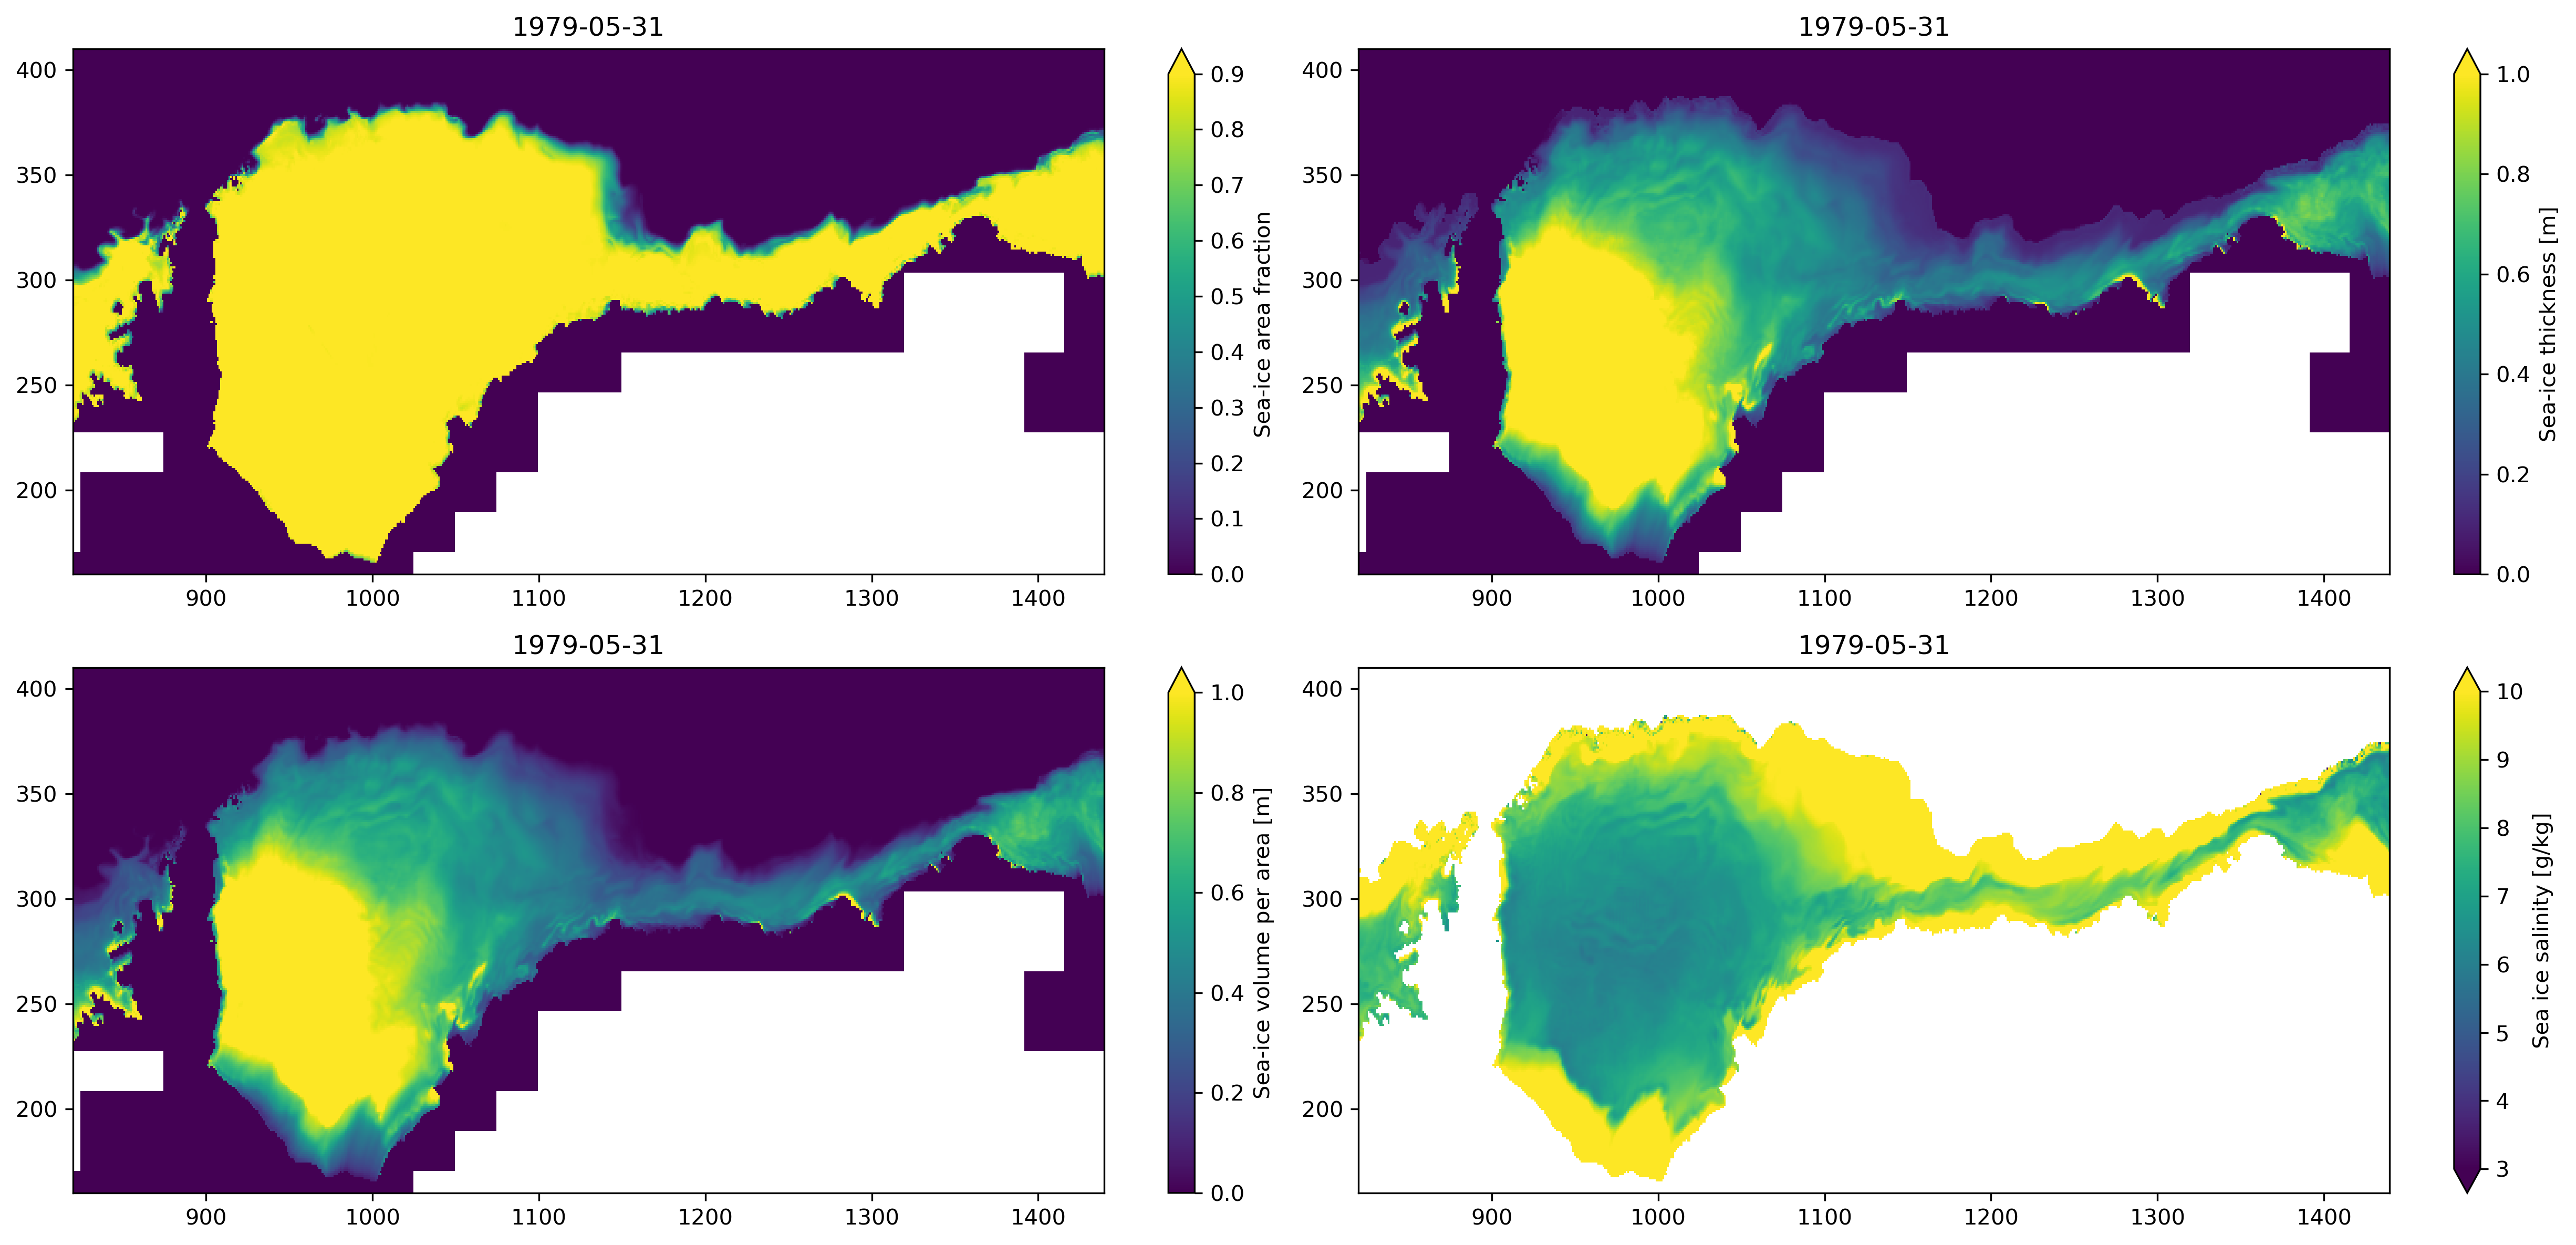

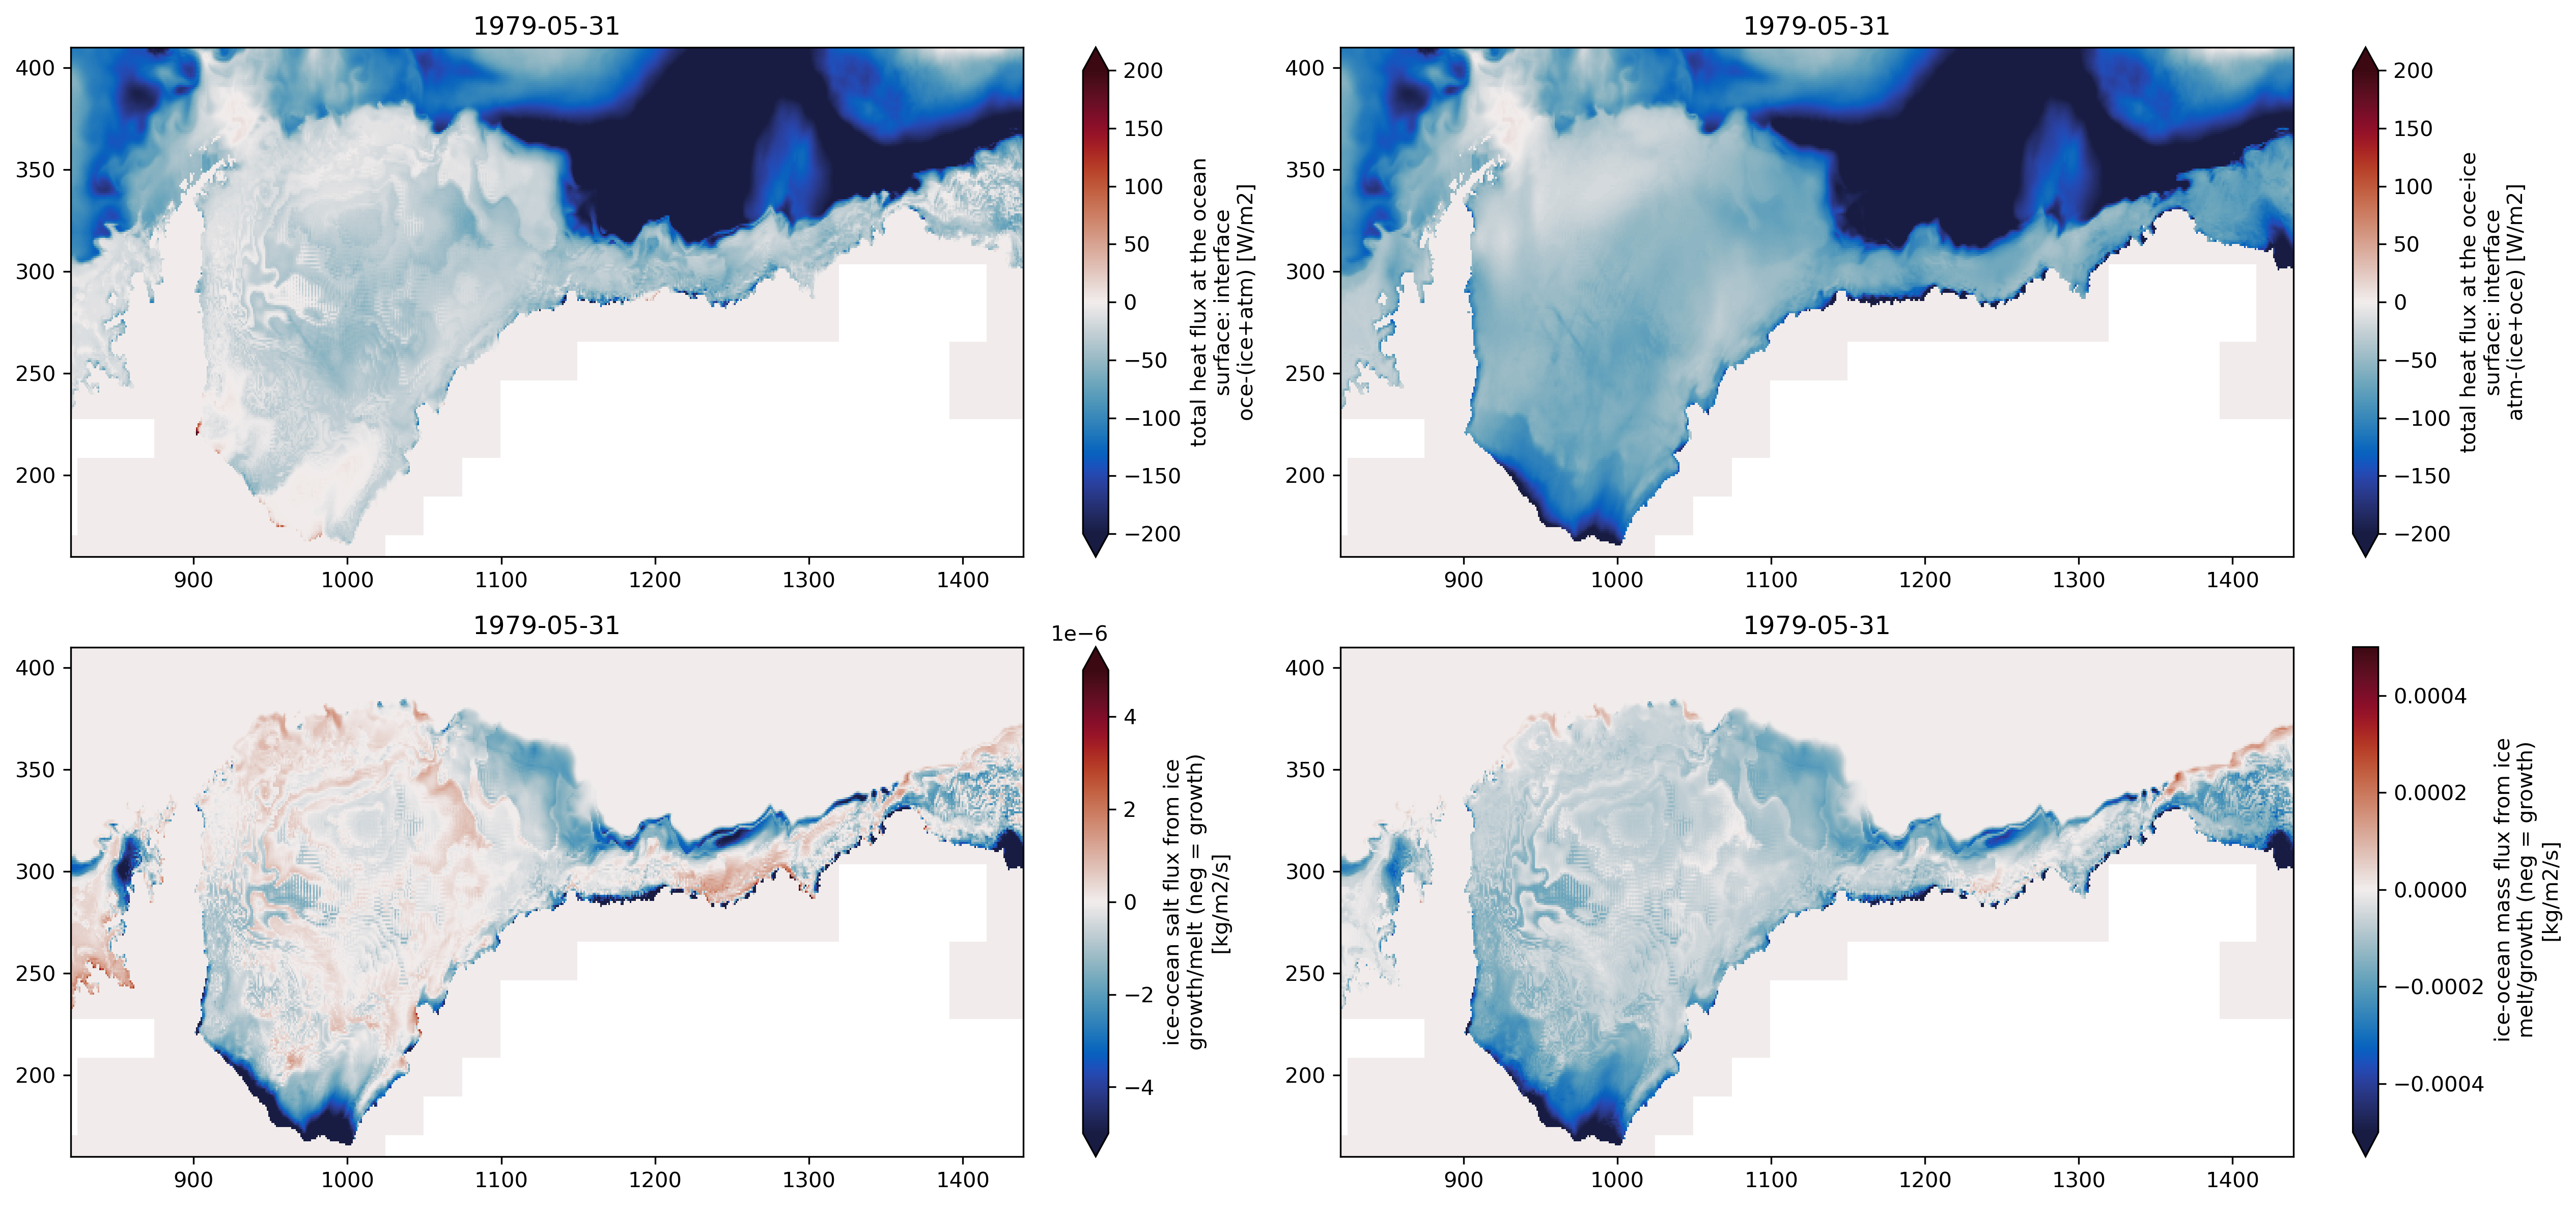

In [4]:
# change to reading in daily files:

run_dir = f'{base_dir}output/ERA5_test7a_1/'
file_list = glob.glob(f'{run_dir}files/*icemod*')[150:151]

for file in file_list:
    print(file)
    ds = xr.open_dataset(file)

    #sivolu, snvolu, sisali, qt_oce_ai, qt_atm_oi, albedo, sfxice, vfxice
    varnames = ['siconc', 'sithic', 'sivolu', 'sisali', 'qt_oce_ai', 'qt_atm_oi', 'sfxice', 'vfxice']
    vrange   = [(0, 0.9), (0, 1), (0,1), (3, 10), (-200, 200), (-200, 200), (-5e-6, 5e-6), (-5e-4, 5e-4)]
    cmaps    = [None, None, None, None, cmocean.cm.balance, cmocean.cm.balance, cmocean.cm.balance, cmocean.cm.balance]
    
    fig1, ax1 = plt.subplots(2,2, figsize=(17,8), dpi=300)
    fig2, ax2 = plt.subplots(2,2, figsize=(17,8), dpi=300)
    for vi, varname in enumerate(varnames):
        if vi <= 3: 
            axes = ax1
            n = vi
        else: 
            axes = ax2
            n = vi-4
        ds[varname].isel(time_counter=0).plot(ax=axes.ravel()[n], xlim=(820,None), ylim=(160, 410), 
                                              vmin=vrange[vi][0], vmax=vrange[vi][1], cmap=cmaps[vi])

        date = np.datetime_as_string(ds.time_counter.isel(time_counter=0), unit='D')
        axes.ravel()[n].set_title(date)
        axes.ravel()[n].set_xlabel(''); axes.ravel()[n].set_ylabel('');

    fig1.set_tight_layout(True); fig2.set_tight_layout(True);
    # fig1.savefig(f'{run_dir}animations/frames/icemod_sea_ice_vars_{date}.png', facecolor='white', transparent=False, format='png')
    # fig2.savefig(f'{run_dir}animations/frames/icemod_flux_vars_{date}.png', facecolor='white', transparent=False, format='png')

    # plt.close(fig1); plt.close(fig2); ds.close();

In [29]:
name_remapping = {'y_grid_T':'y', 'x_grid_T':'x'}
sim_S = xr.open_dataset(f'{base_dir}output/ERA5_test7/files/eANT025.L121_1m_19790101_19791231_grid_T.nc').squeeze().rename(name_remapping)
sim_S_weighted = sim_S.so.weighted(sim_S.e3t.fillna(0))
sim_S_weighted.mean(dim='time_counter').isel(deptht=0).plot(figsize=(15,5))

In [7]:
ds = xr.open_dataset(f'{base_dir}output/ERA5_test7e/files/eANT025.L121_1m_19790101_19791231_icemod.nc')

In [15]:
for key in list(ds.keys()):
    try:
        print(key, ds[key].long_name)
    except:
        continue

simsk Fraction of time steps with sea ice
simsk15 Ice mask (0 if ice conc. lower than 15%, 1 otherwise)
snvolu snow volume
sithic Sea-ice thickness
sivolu Sea-ice volume per area
siconc Sea-ice area fraction
sisali Sea ice salinity
siapnd melt pond concentration
sivpnd melt pond volume
sitemp Mean ice temperature
sntemp Mean snow temperature
sittop temperature at the ice surface
sitbot temperature at the ice bottom
sitsni temperature at the snow-ice interface
sivelu X-component of sea ice velocity
sivelv Y-component of sea ice velocity
sivelo Sea-ice speed
utau_ai X-component of atmospheric stress on sea ice
vtau_ai Y-component of atmospheric stress on sea ice
utau_oi X-component of ocean stress on sea ice
vtau_oi Y-component of ocean stress on sea ice
sidive Divergence of the sea-ice velocity field
sishea Maximum shear of sea-ice velocity field
sistre Compressive sea ice strength
normstr Average normal stress in sea ice
sheastr Maximum shear stress in sea ice
sig1_pnorm P-normalized 1

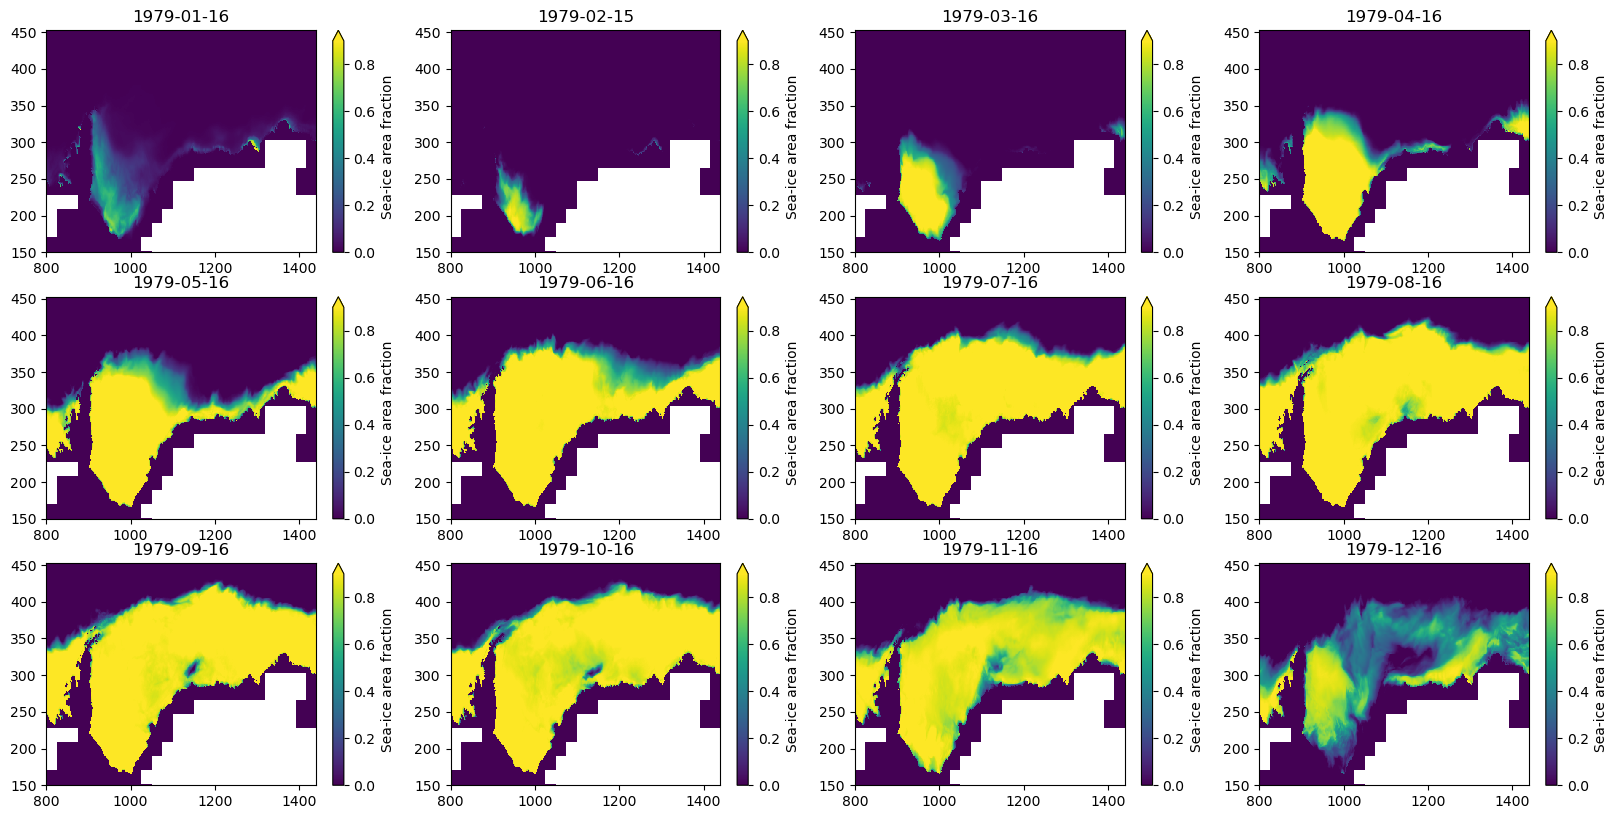

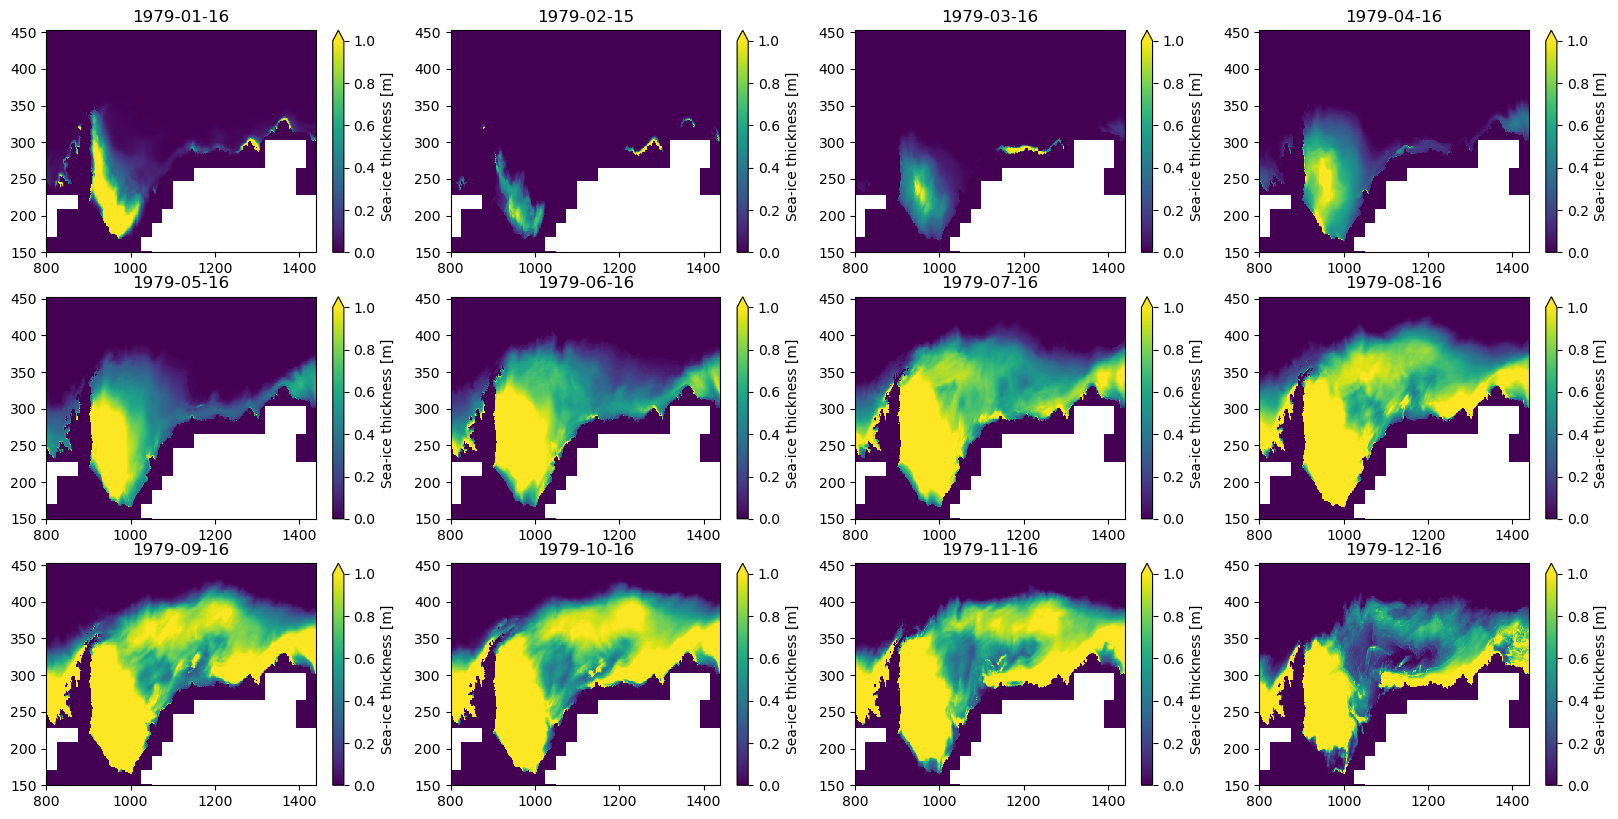

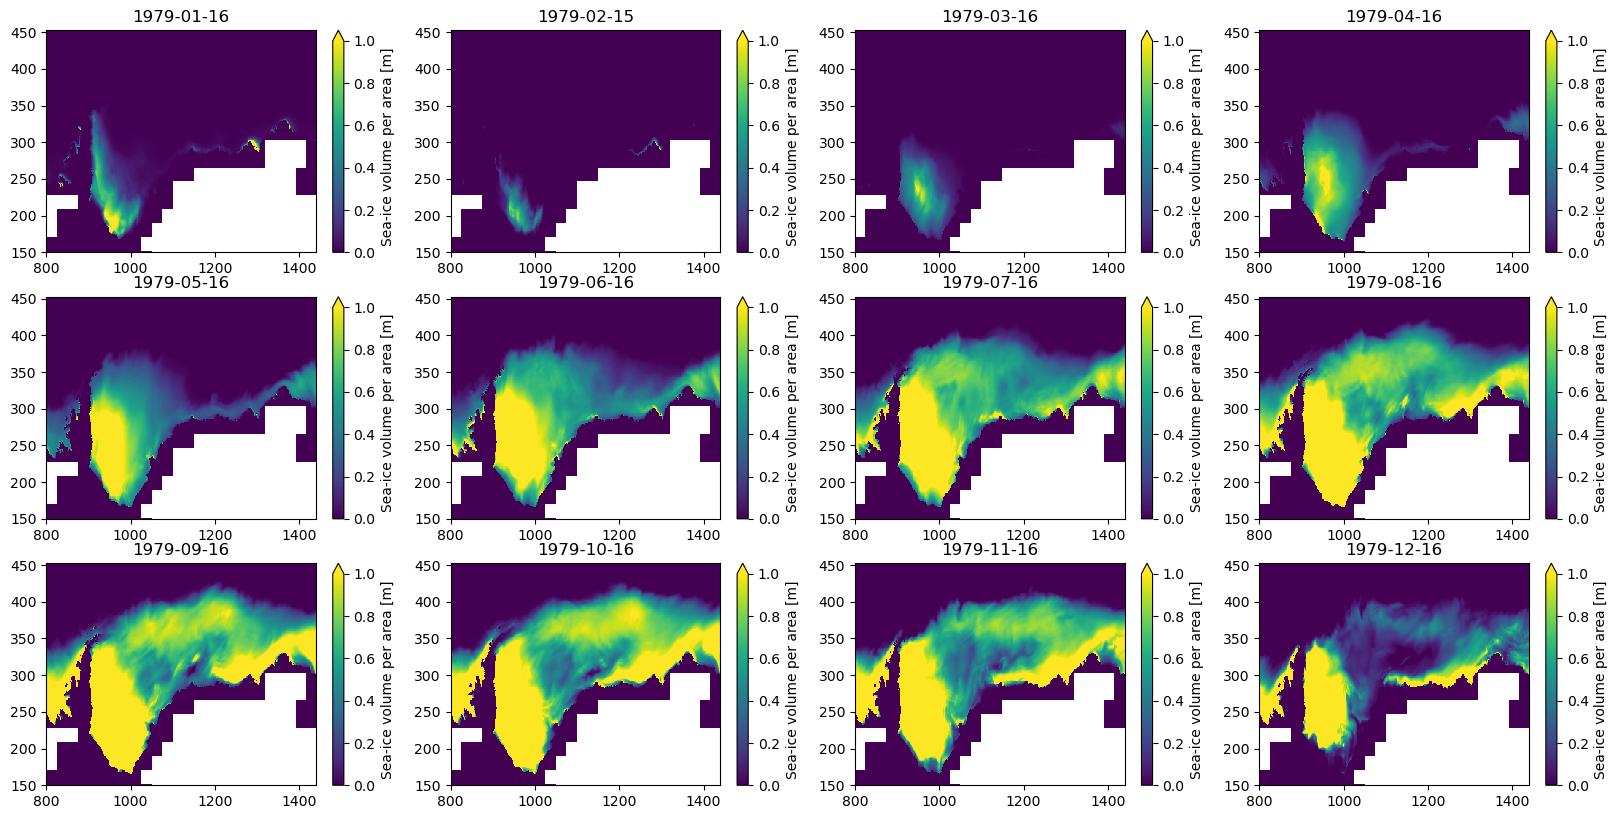

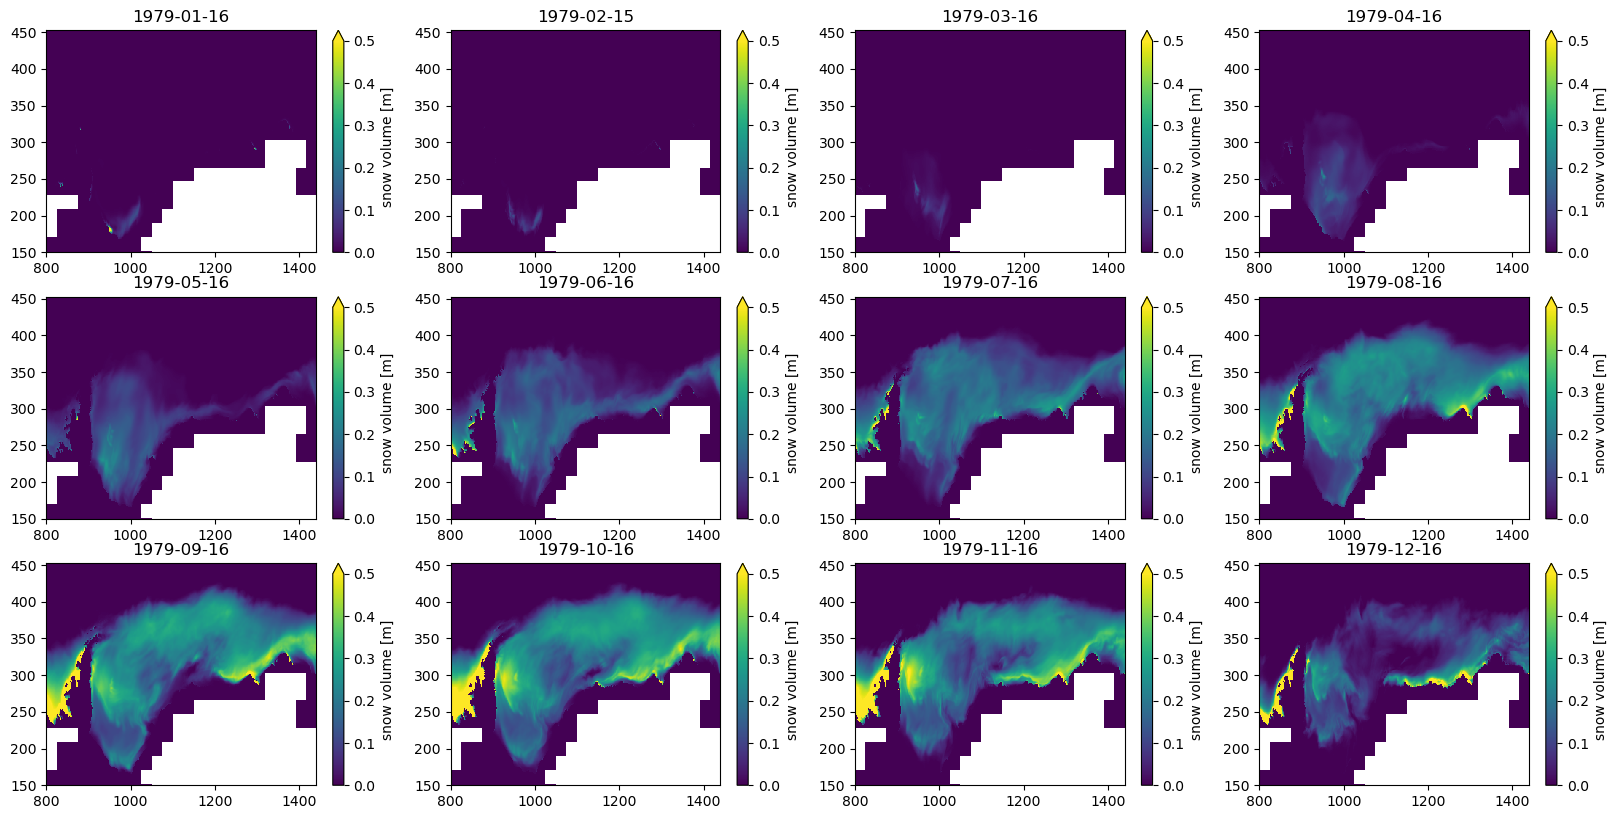

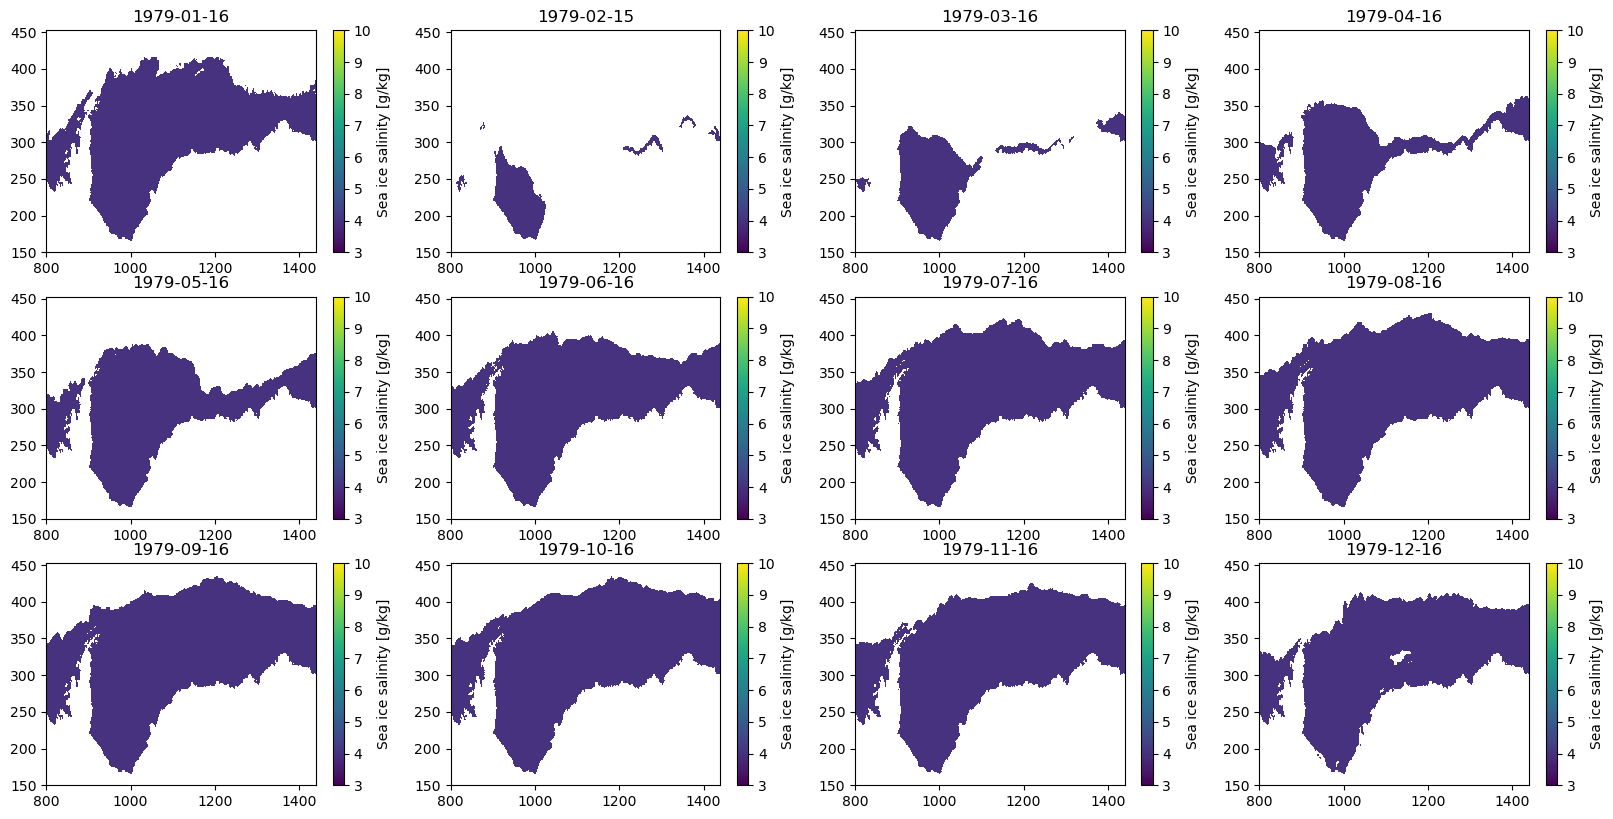

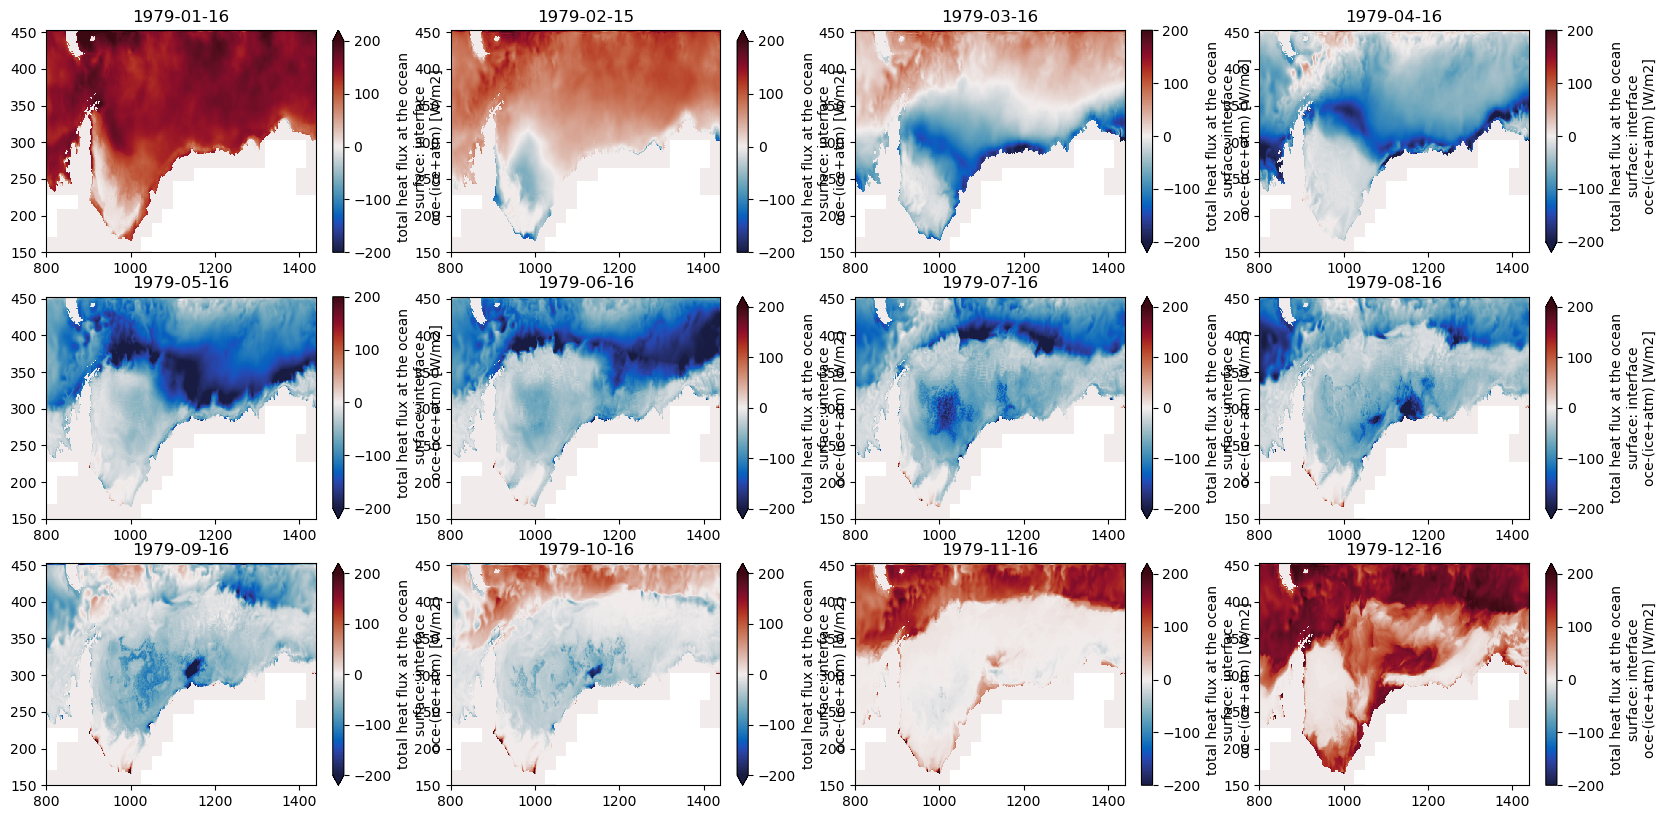

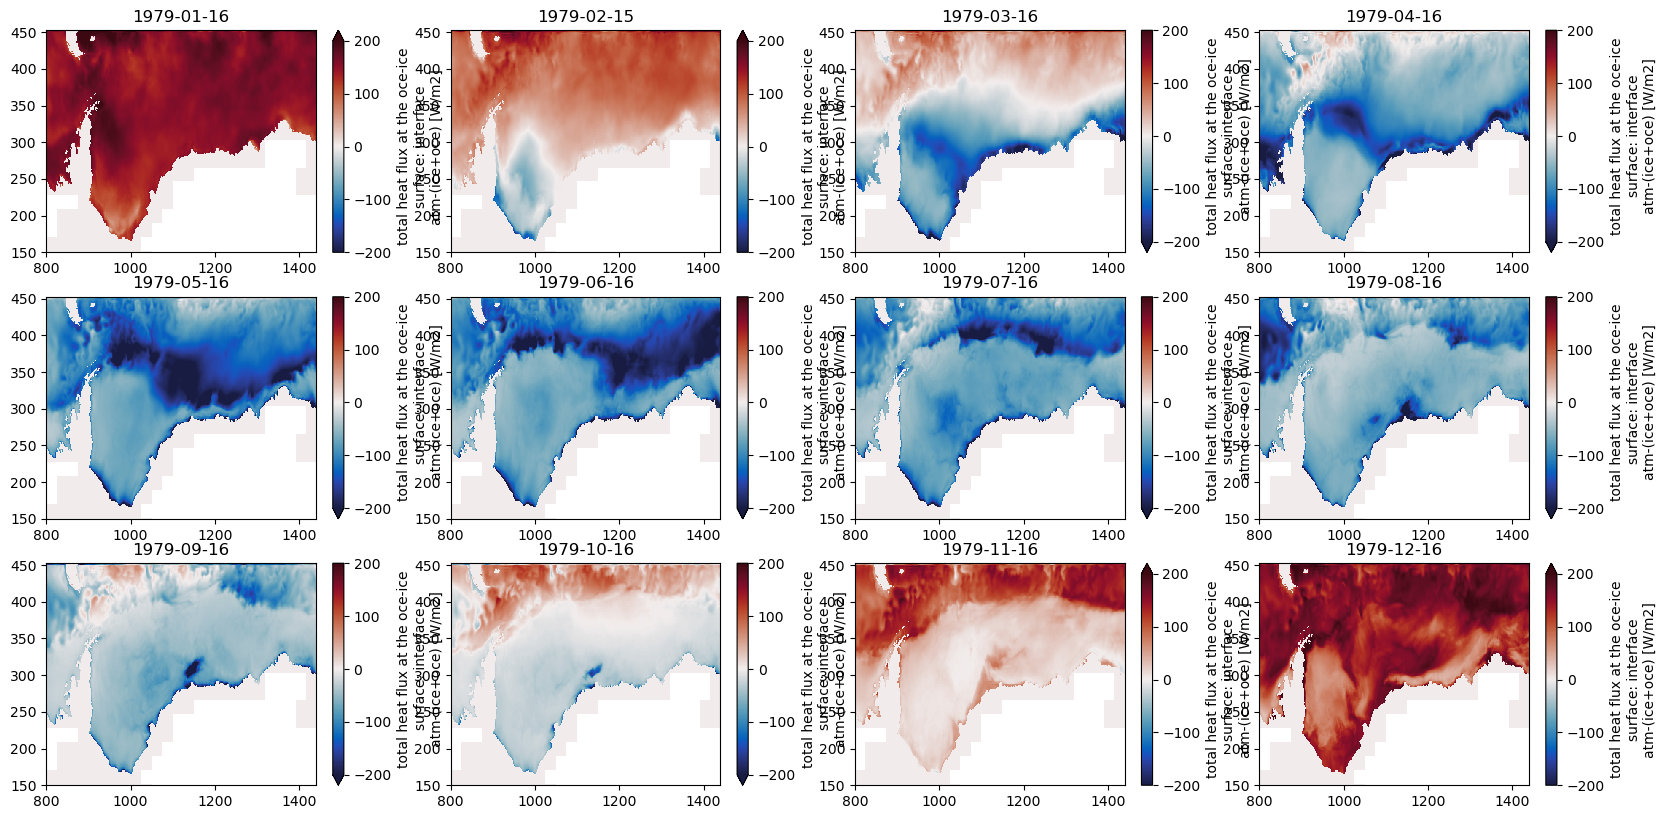

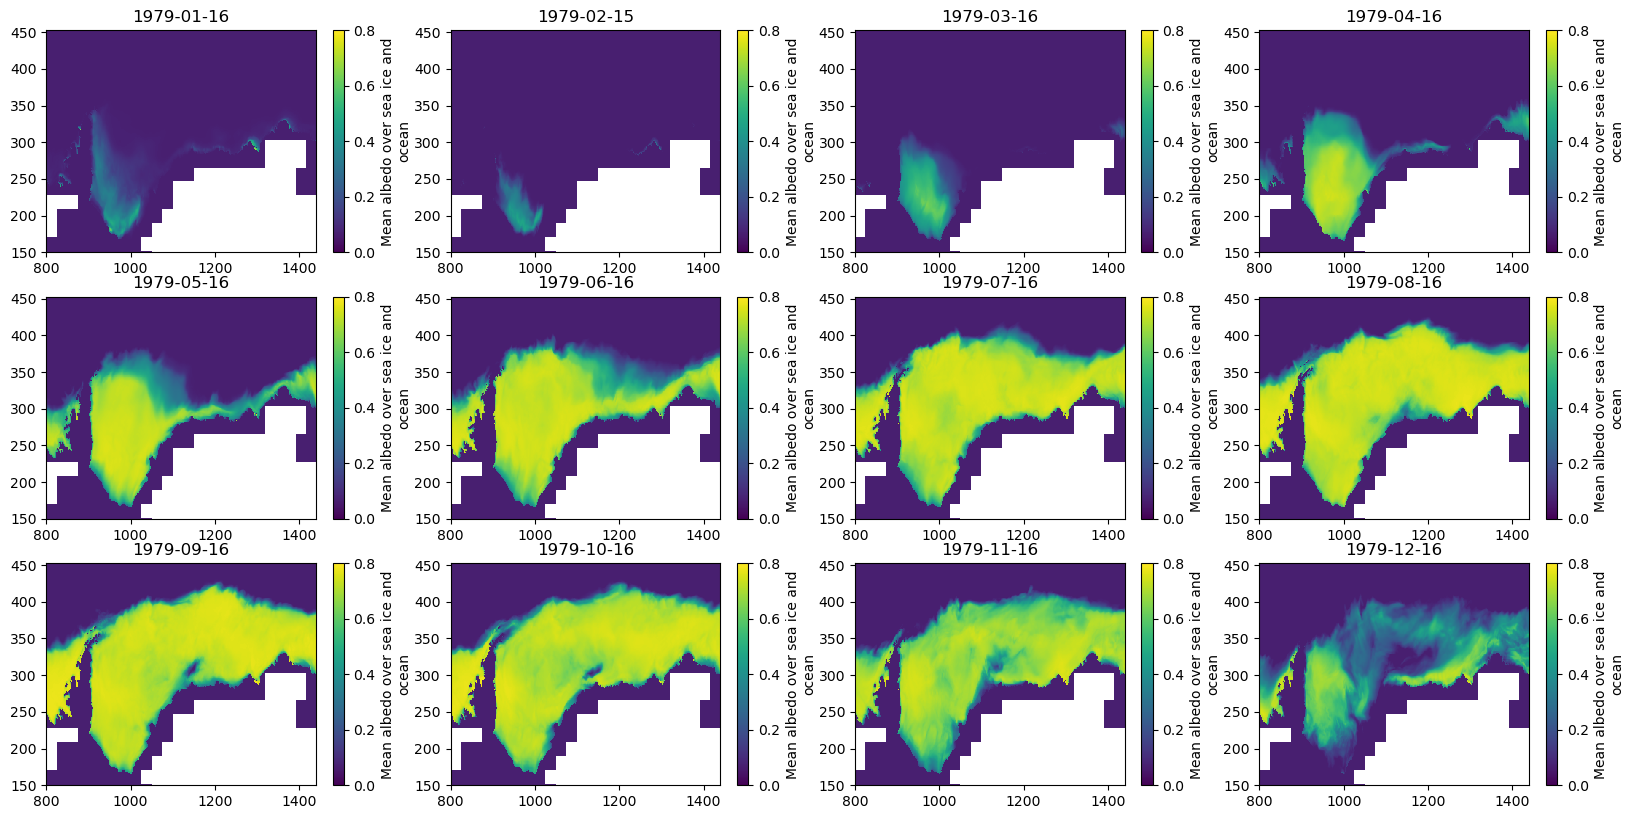

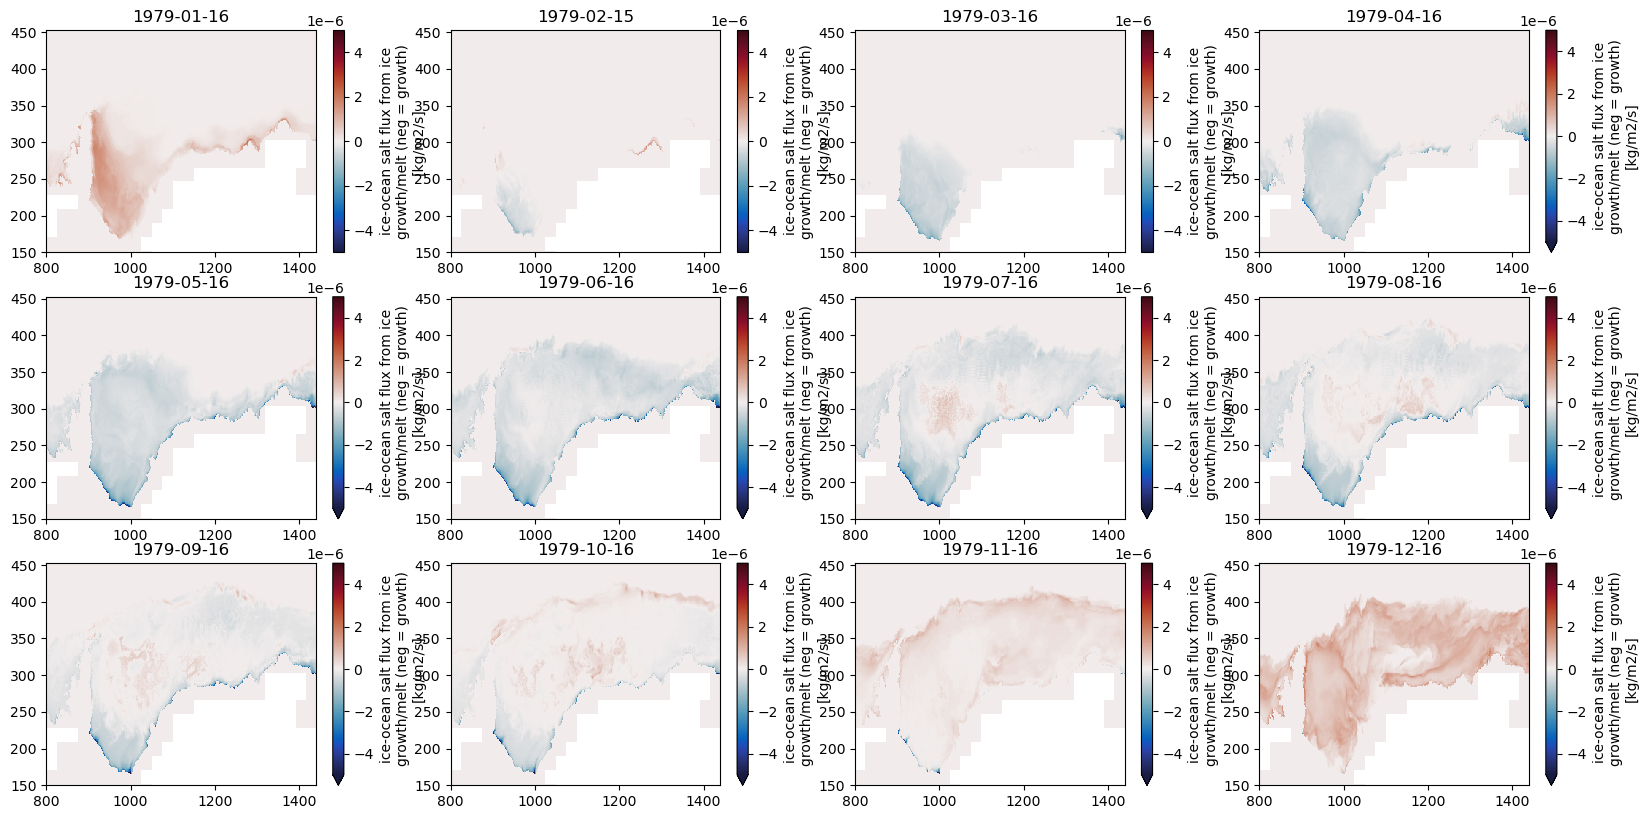

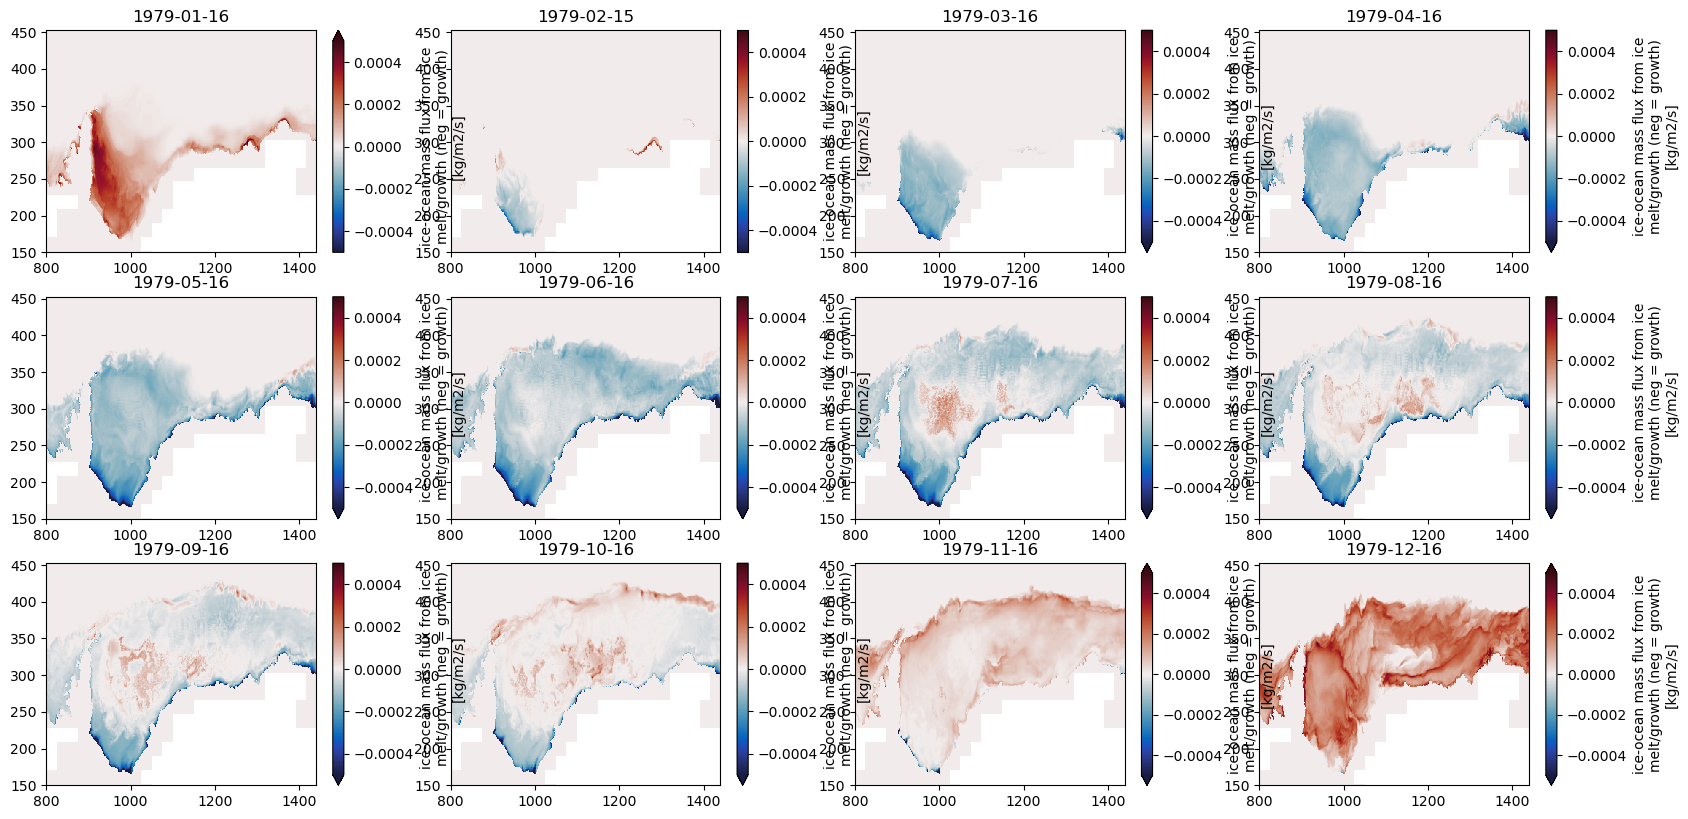

In [8]:
#sivolu, snvolu, sisali, qt_oce_ai, qt_atm_oi, albedo, sfxice, vfxice
varnames = ['siconc', 'sithic', 'sivolu', 'snvolu', 'sisali', 'qt_oce_ai', 'qt_atm_oi', 'albedo', 'sfxice', 'vfxice']
vrange   = [(0, 0.9), (0, 1), (0,1), (0,0.5), (3, 10), (-200, 200), (-200, 200), (0, 0.8), (-5e-6, 5e-6), (-5e-4, 5e-4)]
cmaps    = [None, None, None, None, None, cmocean.cm.balance, cmocean.cm.balance, None, cmocean.cm.balance, cmocean.cm.balance]
for vi, varname in enumerate(varnames):
    fig, ax = plt.subplots(3,4, figsize=(20,10), dpi=100)
    for m, axis in enumerate(ax.ravel()):
        ds[varname].isel(time_counter=m).plot(ax=axis, xlim=(800,None), ylim=(150, None), vmin=vrange[vi][0], vmax=vrange[vi][1], cmap=cmaps[vi])
        axis.set_title(np.datetime_as_string(ds.time_counter.isel(time_counter=m), unit='D'))
        axis.set_xlabel(''); axis.set_ylabel('');

Other things to look at at the same time as the map

- timeseries of surface salinity in my box, and in Tarkan box
- animate

So, what do I see:
- anomaly shows up clearly in the delta T and delta S, with potentially an early pre-cursor visible
- anomaly does or does not appear in the surface or intermediate depth individually: 

In [ ]:
nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'
nemo_mesh_ds = xr.open_dataset(f'{nemo_mesh}').isel(time_counter=0, x=slice(1132,1265), y=slice(310,365)).isel(nav_lev=0)

run_dirs = [f'{base_dir}output/CESM2-present-day6/', f'{base_dir}output/CESM2-piControl_test1/']
labels  = ['LE2 1011.001','Pre-industrial control']

fig, ax = plt.subplots(1,1, figsize=(10,5))
for r, run_dir in enumerate(run_dirs):
    
    files = glob.glob(f'{run_dir}files/eANT025*grid_T*') 
    
    kwags={'preprocess':lambda ds: ds[['sosss', 'area_grid_T', 'time_counter']], 'chunks':'auto'}
    nemo_ds    = xr.open_mfdataset(files, **kwags).rename({'x_grid_T':'x', 'y_grid_T':'y', 'area_grid_T':'area'})
    nemo_ds    = nemo_ds.isel(x=slice(1132,1265), y=slice(310,365)) 
    area_ocean = xr.where(nemo_mesh_ds.tmask==0, np.nan, nemo_ds['area'])
    var_ocean  = xr.where(nemo_mesh_ds.tmask==0, np.nan, nemo_ds['sosss'])
    
    region_var = (var_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
    region_max = region_var.groupby('time_counter.year').max()

    ax.plot(region_max.year, region_max, label=labels[r])

ax.set_title('Weddell Sea Tarkan box averaged annual maximum')
ax.set_ylabel('Absolute surface salinity')
ax.set_xlabel('Year')
ax.legend()